<a href="https://colab.research.google.com/github/FacuNieto/AP_4.0_Arboles/blob/main/Demo_Practica_Arboles_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

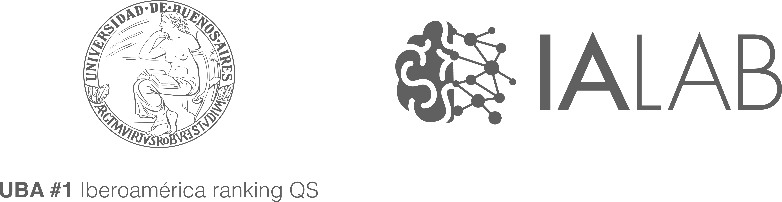

# **Argentina Programa 4.0 - 2023 - Árboles de decisión 🌳🌳**

---

*   Autor/es: Ing. Facundo Nieto
*   Dirección: Dra. Laura Cecilia Diaz Davila y Dr. Gerardo Ignacio Simari

---


# 1️⃣ Ejemplo

Una pequeña farmacéutica produce una nueva y exitosa medicación cuya composición se basa principalmente en componentes de origen vegetal.
Debido al aumento de ventas de este medicamento el fabricante decide mejorar el proceso para que sea más rápido y eficiente maximizando el volumen de fabricación. El área de procesos determinó que uno de los cuellos de botella se encuentra en la clasificación humana de los componentes vegetales debido a que las plantas utilizadas tienen características visuales muy similares, y deben ser clasificadas por un empleado experimentado.

Los componentes vegetales consisten de 3 tipos de flores diferentes:

El área de investigación y desarrollo desarrolló un sistema de visión artificial capaz de calcular:


*  El largo y el ancho del pétalo.
*  El largo y el ancho del sépalo.





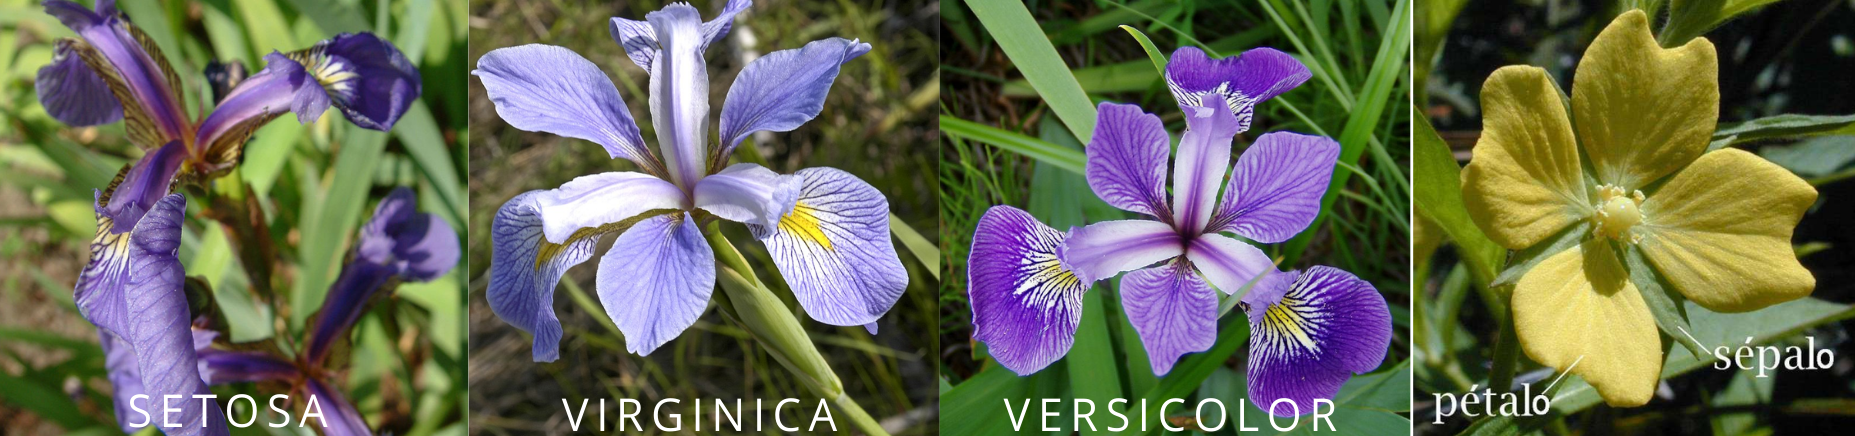

##🔶1.1 Carga de librerías

In [ ]:
# Importamos librerias numpy, pandas y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos dataset
from sklearn.datasets import load_iris

# Importamos algoritmo árbol de decisión y la herramienta para plotear el árbol
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report

##🔶1.2 Carga, analisis y visualización de dataset.

### 1.2.1 Carga de dataset

In [ ]:
# Cargamos el dataset
iris = load_iris()

In [ ]:
# Visualizamos en un dataframe
iris_df= pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
display(iris_df)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
# Concatenamos la información de data con target
iris_df_c=pd.DataFrame(data= np.c_[iris.data , iris.target], columns= iris['feature_names'] + ['target'])
display(iris_df_c)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

In [ ]:
# Verificar nulls
iris_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### 1.2.2 Visualización

In [ ]:
target_n = []
for i in range(len(iris['target'])):
  target_n.append(iris['target_names'][iris['target'][i]])

In [ ]:
iris_df_graph = iris_df_c.copy()

In [ ]:
iris_df_graph['target_graph'] = pd.DataFrame(target_n)

In [ ]:
iris_df_graph = iris_df_graph.drop('target', axis=1)

In [ ]:
iris_df_graph

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

    target_graph  
0         setosa  
1         setosa  
2         setosa  
3         setosa  
4         setosa  
..           ...  
145    virginica  
146    virginica  
147    virginica  
148    virginica  
149    virginica  

[150 rows x 5 columns]

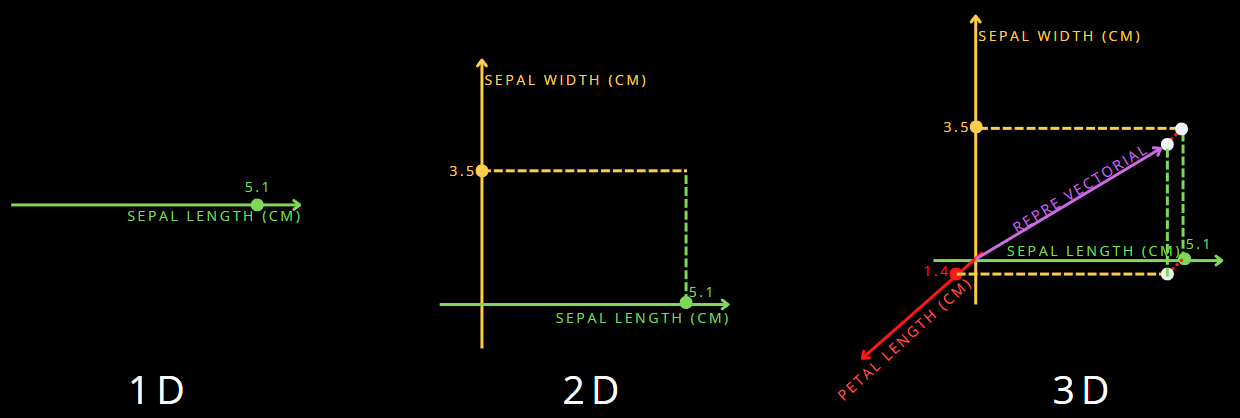

!["asdf"](https://raw.githubusercontent.com/FacuNieto/AP_4.0_Arboles/main/AP_4.0_PC.gif)


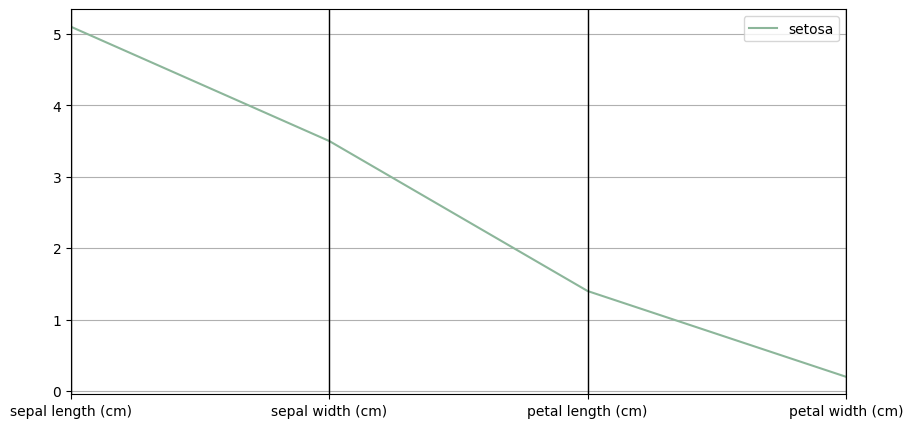

In [ ]:
#@title Coord paralelas
variable_name = 1 #@param {type:"slider", min:1, max:149, step:1}
# Generamos un gráfico de coordenadas paralelas.
plt.rcParams["figure.dpi"] = 100
fig = plt.figure(figsize = (10, 5))
pd.plotting.parallel_coordinates(iris_df_graph[:variable_name],'target_graph')
plt.show()

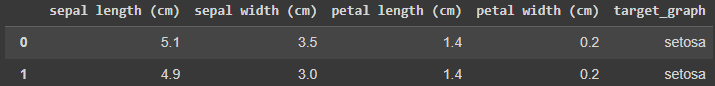

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(iris_df_c, color='target',
                              dimensions=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1)
fig.show()

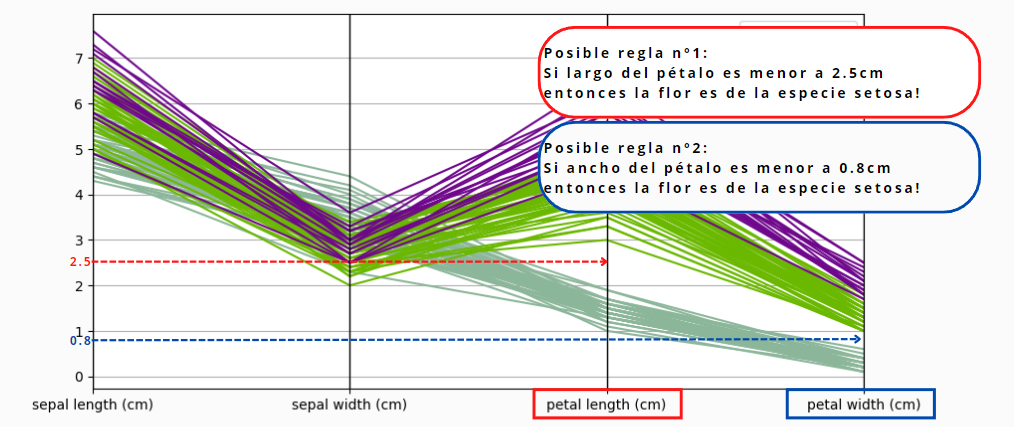

##🔶1.3 Generación de datos de entrenamiento y prueba

In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba

x= iris_df_c.drop('target', axis = 1)
y= iris_df_c['target']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=3)

##🔶1.4 Carga y entrenamiento de modelo

In [ ]:
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

# Hacemos la predicción:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision = ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.9473684210526315
precision =  0.9419191919191919


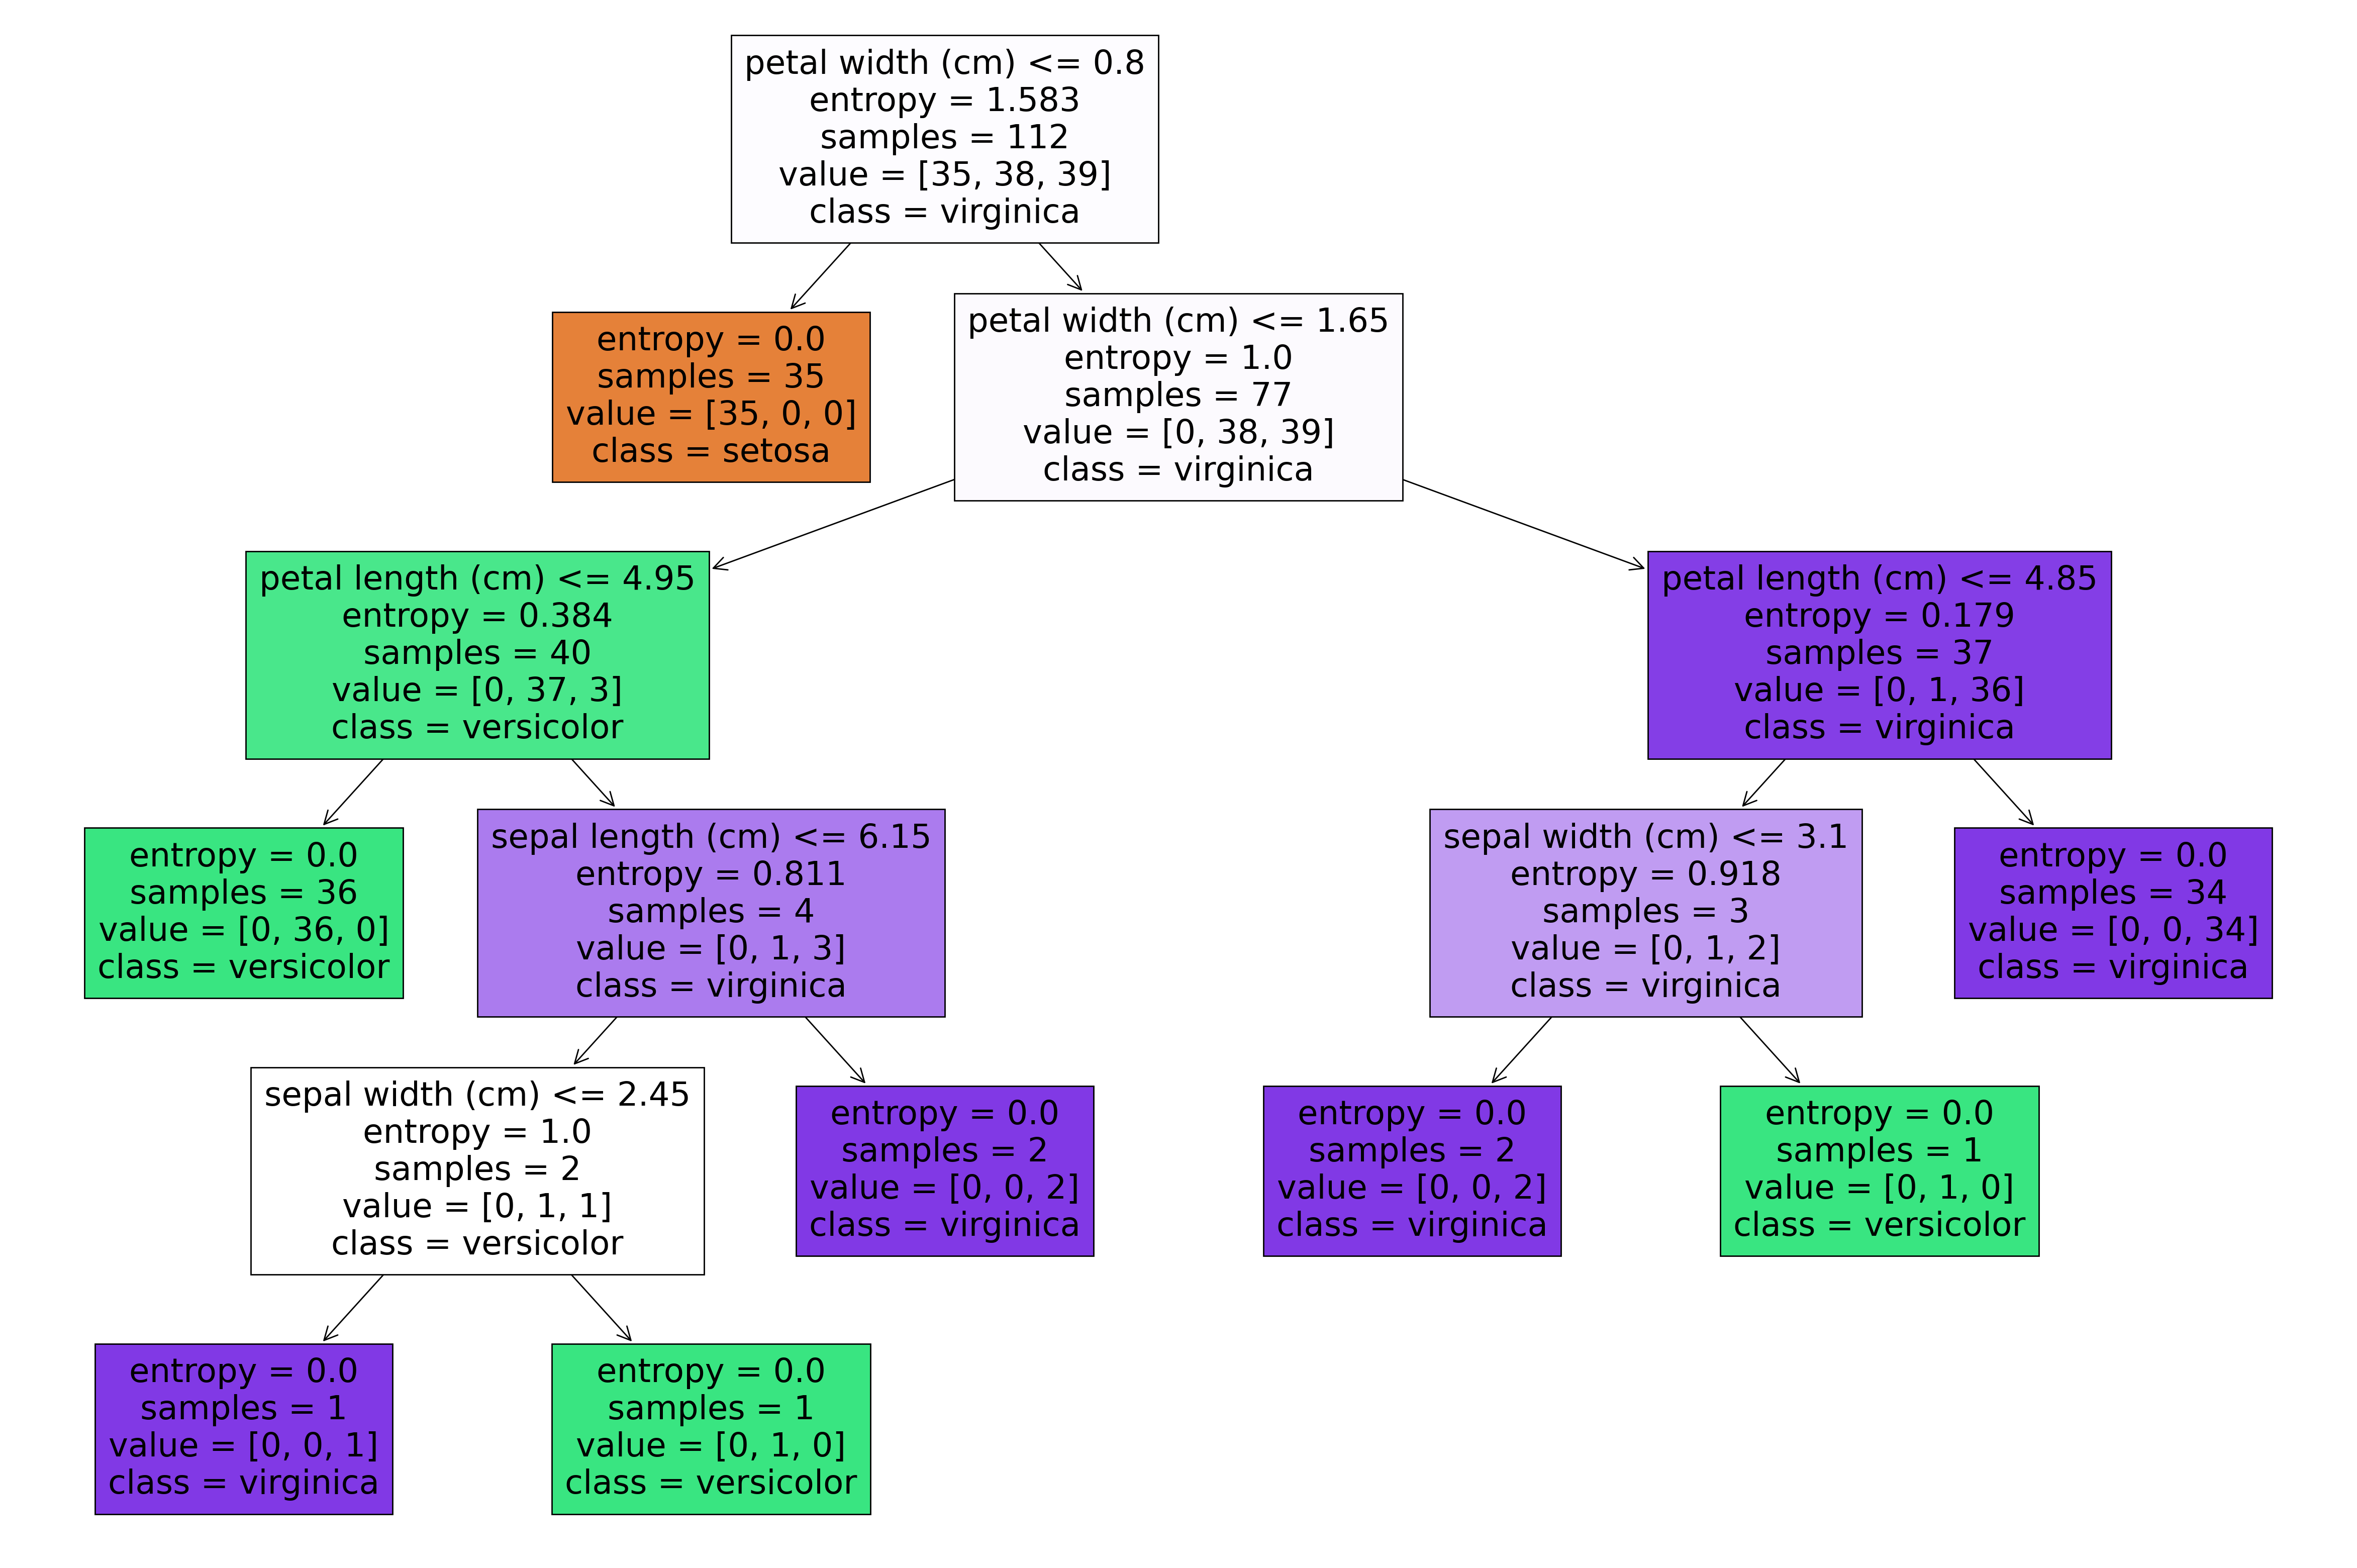

In [ ]:
# Graficamos árbol de decisión.
plt.rcParams["figure.dpi"] = 200
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, class_names = iris.target_names, feature_names = iris.feature_names)
# plt.savefig('arbol.png')
plt.show()

# 2️⃣Ejemplo

🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺

Sucede que debe encontrar el estilo de cerveza basado en la información que obtiene en la etiqueta.

En este caso usted cuenta con:

* Contenido de Alcohol por Volumen (ABV)
* Unidades Internacionales de Amargura (min y max)
* Astringencia
* Cuerpo
* Alcohol
* Lupulado
* Malta

Revisando kaggle encuentra un dataset de distintos tipos de cerveza!
https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set

##🔶2.1 Clonamos repositorio y leemos dataset

In [ ]:
!git clone https://github.com/FacuNieto/AP_4.0_Arboles.git

Cloning into 'AP_4.0_Arboles'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 14.57 MiB | 18.32 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
df_beer = pd.read_csv('/content/AP_4.0_Arboles/beer_data_raw.csv', delimiter=';')

In [ ]:
df_beer

Nombre                      Estilo  \
0                    Honker's Ale            Bitter - English   
1           Fuller's London Pride            Bitter - English   
2                 Bluebird Bitter            Bitter - English   
3    Spitfire Premium Kentish Ale            Bitter - English   
4        Younger's Special Bitter            Bitter - English   
..                            ...                         ...   
730            Saranac Summer Ale  Wheat Beer - American Pale   
731                     Sun Block  Wheat Beer - American Pale   
732   Funk Blueberry Citrus Wheat  Wheat Beer - American Pale   
733                 Willy Vanilly  Wheat Beer - American Pale   
734                     Canebrake  Wheat Beer - American Pale   

                       Cervecería  \
0           Goose Island Beer Co.   
1       Fuller Smith & Turner PLC   
2        Coniston Brewing Co. Ltd   
3              Shepherd Neame Ltd   
4                      Rogue Ales   
..                            ...   
730          Matt Brewing Company   
731  Captain Lawrence Brewing Co.   
732        DuClaw Brewing Company   
733           Alpine Beer Company   
734        Parish Brewing Company   

                                      Nombre completo  \
0                  Goose Island Beer Co. Honker's Ale   
1     Fuller Smith & Turner PLC Fuller's London Pride   
2            Coniston Brewing Co. Ltd Bluebird Bitter   
3    Shepherd Neame Ltd Spitfire (Premium Ale Export)   
4                 Rogue Ales Younger's Special Bitter   
..                                                ...   
730           Matt Brewing Company Saranac Summer Ale   
731      Captain Lawrence Brewing Co. Sun Block Witte   
732                       DuClaw Brewing Company Funk   
733                 Alpine Beer Company Willy Vanilly   
734                  Parish Brewing Company Canebrake   

                                           Descripción  ABV  Min IBU  Max IBU  \
0    Notes:Golden sunset color, fruity hop aroma, b...  4.3    200.0     35.0   
1    Notes:Not just the iconic ale of the capital, ...  4.7     20.0     35.0   
2    Notes:Bluebird is a fine session ale with a li...  NaN      NaN     35.0   
3    Notes:This 4.2% Kentish ale (bottle 4.5%) was ...  4.5     20.0     35.0   
4                                               Notes:  4.8     20.0      NaN   
..                                                 ...  ...      ...      ...   
730  Notes:Available in the 12 Beers of Summer samp...  4.7     10.0     35.0   
731  Notes:As the sun starts to peek out from aroun...  4.5     10.0     35.0   
732  Notes:The traditional American Wheat Ale serve...  5.0     10.0     35.0   
733  Notes:The base for this beer is Willy Wheat. T...  5.5     10.0     35.0   
734  Notes:Canebrake is crisp and smooth with a bea...  5.5     10.0     35.0   

     Astringencia  Cuerpo (Body)  Alcohol  Amargo (Bitter)  Dulce (Sweet)  \
0              14             35      3.0               53             66   
1              21             49      9.0               58             67   
2              29             43     15.0               62             52   
3              16             22      NaN               51             29   
4              20             69     14.0               74             44   
..            ...            ...      ...              ...            ...   
730            19             31      4.0               32             29   
731            28             52     11.0               73             33   
732            18             32     10.0               21            118   
733            17             35     11.0               16             16   
734            21             29      NaN               19             94   

     Agrio (Sour)  Salado (Salty)  Frutas (Fruits)  Lupulado (Hoppy)  \
0              28               1               32              58.0   
1              32               0               33             101.0   
2 

##🔶2.2 Dos caminos

In [ ]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre             735 non-null    object 
 1   Estilo             735 non-null    object 
 2   Cervecería         735 non-null    object 
 3   Nombre completo    735 non-null    object 
 4   Descripción        735 non-null    object 
 5   ABV                684 non-null    float64
 6   Min IBU            685 non-null    float64
 7   Max IBU            685 non-null    float64
 8   Astringencia       735 non-null    int64  
 9   Cuerpo (Body)      735 non-null    int64  
 10  Alcohol            685 non-null    float64
 11  Amargo (Bitter)    735 non-null    int64  
 12  Dulce (Sweet)      735 non-null    int64  
 13  Agrio (Sour)       735 non-null    int64  
 14  Salado (Salty)     735 non-null    int64  
 15  Frutas (Fruits)    735 non-null    int64  
 16  Lupulado (Hoppy)   685 non



---


Eliminar columnas que no se usaran en la inferencia!!!

'ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Cuerpo (Body)', 'Alcohol', 'Lupulado (Hoppy)', 'Malta (Malty)'



---



In [ ]:
# Eliminamos columnas
columnas_a_eliminar =['Nombre', 'Cervecería', 'Nombre completo', 'Descripción',
                      'Amargo (Bitter)', 'Dulce (Sweet)', 'Agrio (Sour)', 'Salado (Salty)',
                      'Frutas (Fruits)',  'Especias (Spices)']
df_beer = df_beer.drop(columns=columnas_a_eliminar)

In [ ]:
# Verificar nulos y tipos de datos
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estilo            735 non-null    object 
 1   ABV               684 non-null    float64
 2   Min IBU           685 non-null    float64
 3   Max IBU           685 non-null    float64
 4   Astringencia      735 non-null    int64  
 5   Cuerpo (Body)     735 non-null    int64  
 6   Alcohol           685 non-null    float64
 7   Lupulado (Hoppy)  685 non-null    float64
 8   Malta (Malty)     685 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.8+ KB


In [ ]:
# Obtener los valores únicos de la columna "Estilo"
valores_unicos = df_beer["Estilo"].unique()

print("Valores únicos en la columna 'Estilo':")
for valor in valores_unicos:
    print(f"- {valor}")

print('Cantidad de categorías:', len(valores_unicos))

Valores únicos en la columna 'Estilo':
- Bitter - English
- Blonde Ale - American
- Bock - Traditional
- Brown Ale - American
- Dubbel
- IPA - Imperial
- Kölsch
- Lager - Munich Dunkel
- Lambic - Traditional
- Mild Ale - English Dark
- Old Ale
- Pale Ale - Belgian
- Pilsner - German
- Porter - English
- Pumpkin Beer
- Red Ale - Irish
- Scottish Ale
- Smoked Beer
- Stout - American
- Strong Ale - English
- Tripel
- Wheat Beer - American Pale
Cantidad de categorías: 22


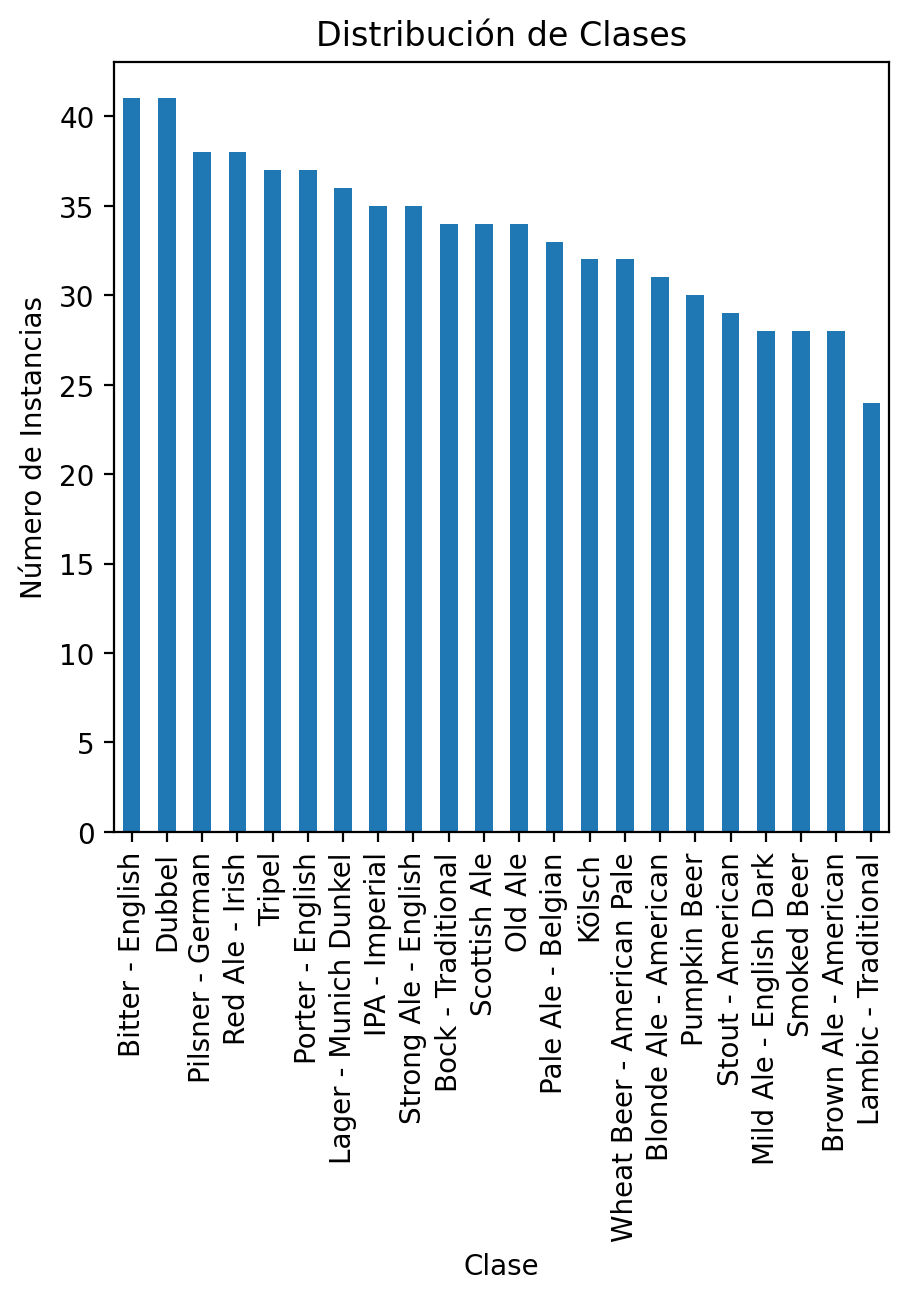

Porcentaje de instancias por clase:
Bitter - English              5.578231
Dubbel                        5.578231
Pilsner - German              5.170068
Red Ale - Irish               5.170068
Tripel                        5.034014
Porter - English              5.034014
Lager - Munich Dunkel         4.897959
IPA - Imperial                4.761905
Strong Ale - English          4.761905
Bock - Traditional            4.625850
Scottish Ale                  4.625850
Old Ale                       4.625850
Pale Ale - Belgian            4.489796
Kölsch                        4.353741
Wheat Beer - American Pale    4.353741
Blonde Ale - American         4.217687
Pumpkin Beer                  4.081633
Stout - American              3.945578
Mild Ale - English Dark       3.809524
Smoked Beer                   3.809524
Brown Ale - American          3.809524
Lambic - Traditional          3.265306
Name: Estilo, dtype: float64


In [ ]:
# Contar las instancias de cada clase
counts = df_beer["Estilo"].value_counts()

# Visualizar la distribución
plt.figure(figsize=(5, 5))
counts.plot(kind="bar")
plt.title("Distribución de Clases")
plt.xlabel("Clase")
plt.ylabel("Número de Instancias")
plt.show()

# Calcular el porcentaje de cada clase
total_instances = len(df_beer)
class_percentages = counts / total_instances * 100

# Imprimir los porcentajes de cada clase
print("Porcentaje de instancias por clase:")
print(class_percentages)


###🟢2.2.1 Camino simple

#### 2.2.1.1 Limpieza

In [ ]:
# Eliminar filas con valores nulos
df_beer_sin_nulos = df_beer.dropna()

# Mostrar información sobre el DataFrame limpio
print(df_beer_sin_nulos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 733
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estilo            483 non-null    object 
 1   ABV               483 non-null    float64
 2   Min IBU           483 non-null    float64
 3   Max IBU           483 non-null    float64
 4   Astringencia      483 non-null    int64  
 5   Cuerpo (Body)     483 non-null    int64  
 6   Alcohol           483 non-null    float64
 7   Lupulado (Hoppy)  483 non-null    float64
 8   Malta (Malty)     483 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 37.7+ KB
None


In [ ]:
import pandas as pd

# Calcular los valores estadísticos
statistics = df_beer_sin_nulos.describe()
print("Valores estadísticos:")
print(statistics)

# Calcular los valores estadísticos
statistics = df_beer.describe()
print("Valores estadísticos:")
print(statistics)

Valores estadísticos:
              ABV     Min IBU     Max IBU  Astringencia  Cuerpo (Body)  \
count  483.000000  483.000000  483.000000    483.000000     483.000000   
mean     9.135176   27.347826   44.047619     20.432712      46.915114   
std     21.754164   43.567412   42.209758     40.264184      23.748838   
min      2.900000    0.000000   10.000000      1.000000       1.000000   
25%      5.000000   15.000000   30.000000      9.500000      32.000000   
50%      5.800000   20.000000   30.000000     15.000000      42.000000   
75%      7.500000   25.000000   45.000000     21.000000      56.000000   
max    325.000000  650.000000  600.000000    770.000000     158.000000   

          Alcohol  Lupulado (Hoppy)  Malta (Malty)  
count  483.000000        483.000000     483.000000  
mean    20.863354         42.894410      80.198758  
std     38.411265         27.760745      36.760719  
min      0.000000          0.000000       0.000000  
25%      6.000000         23.000000      53.00

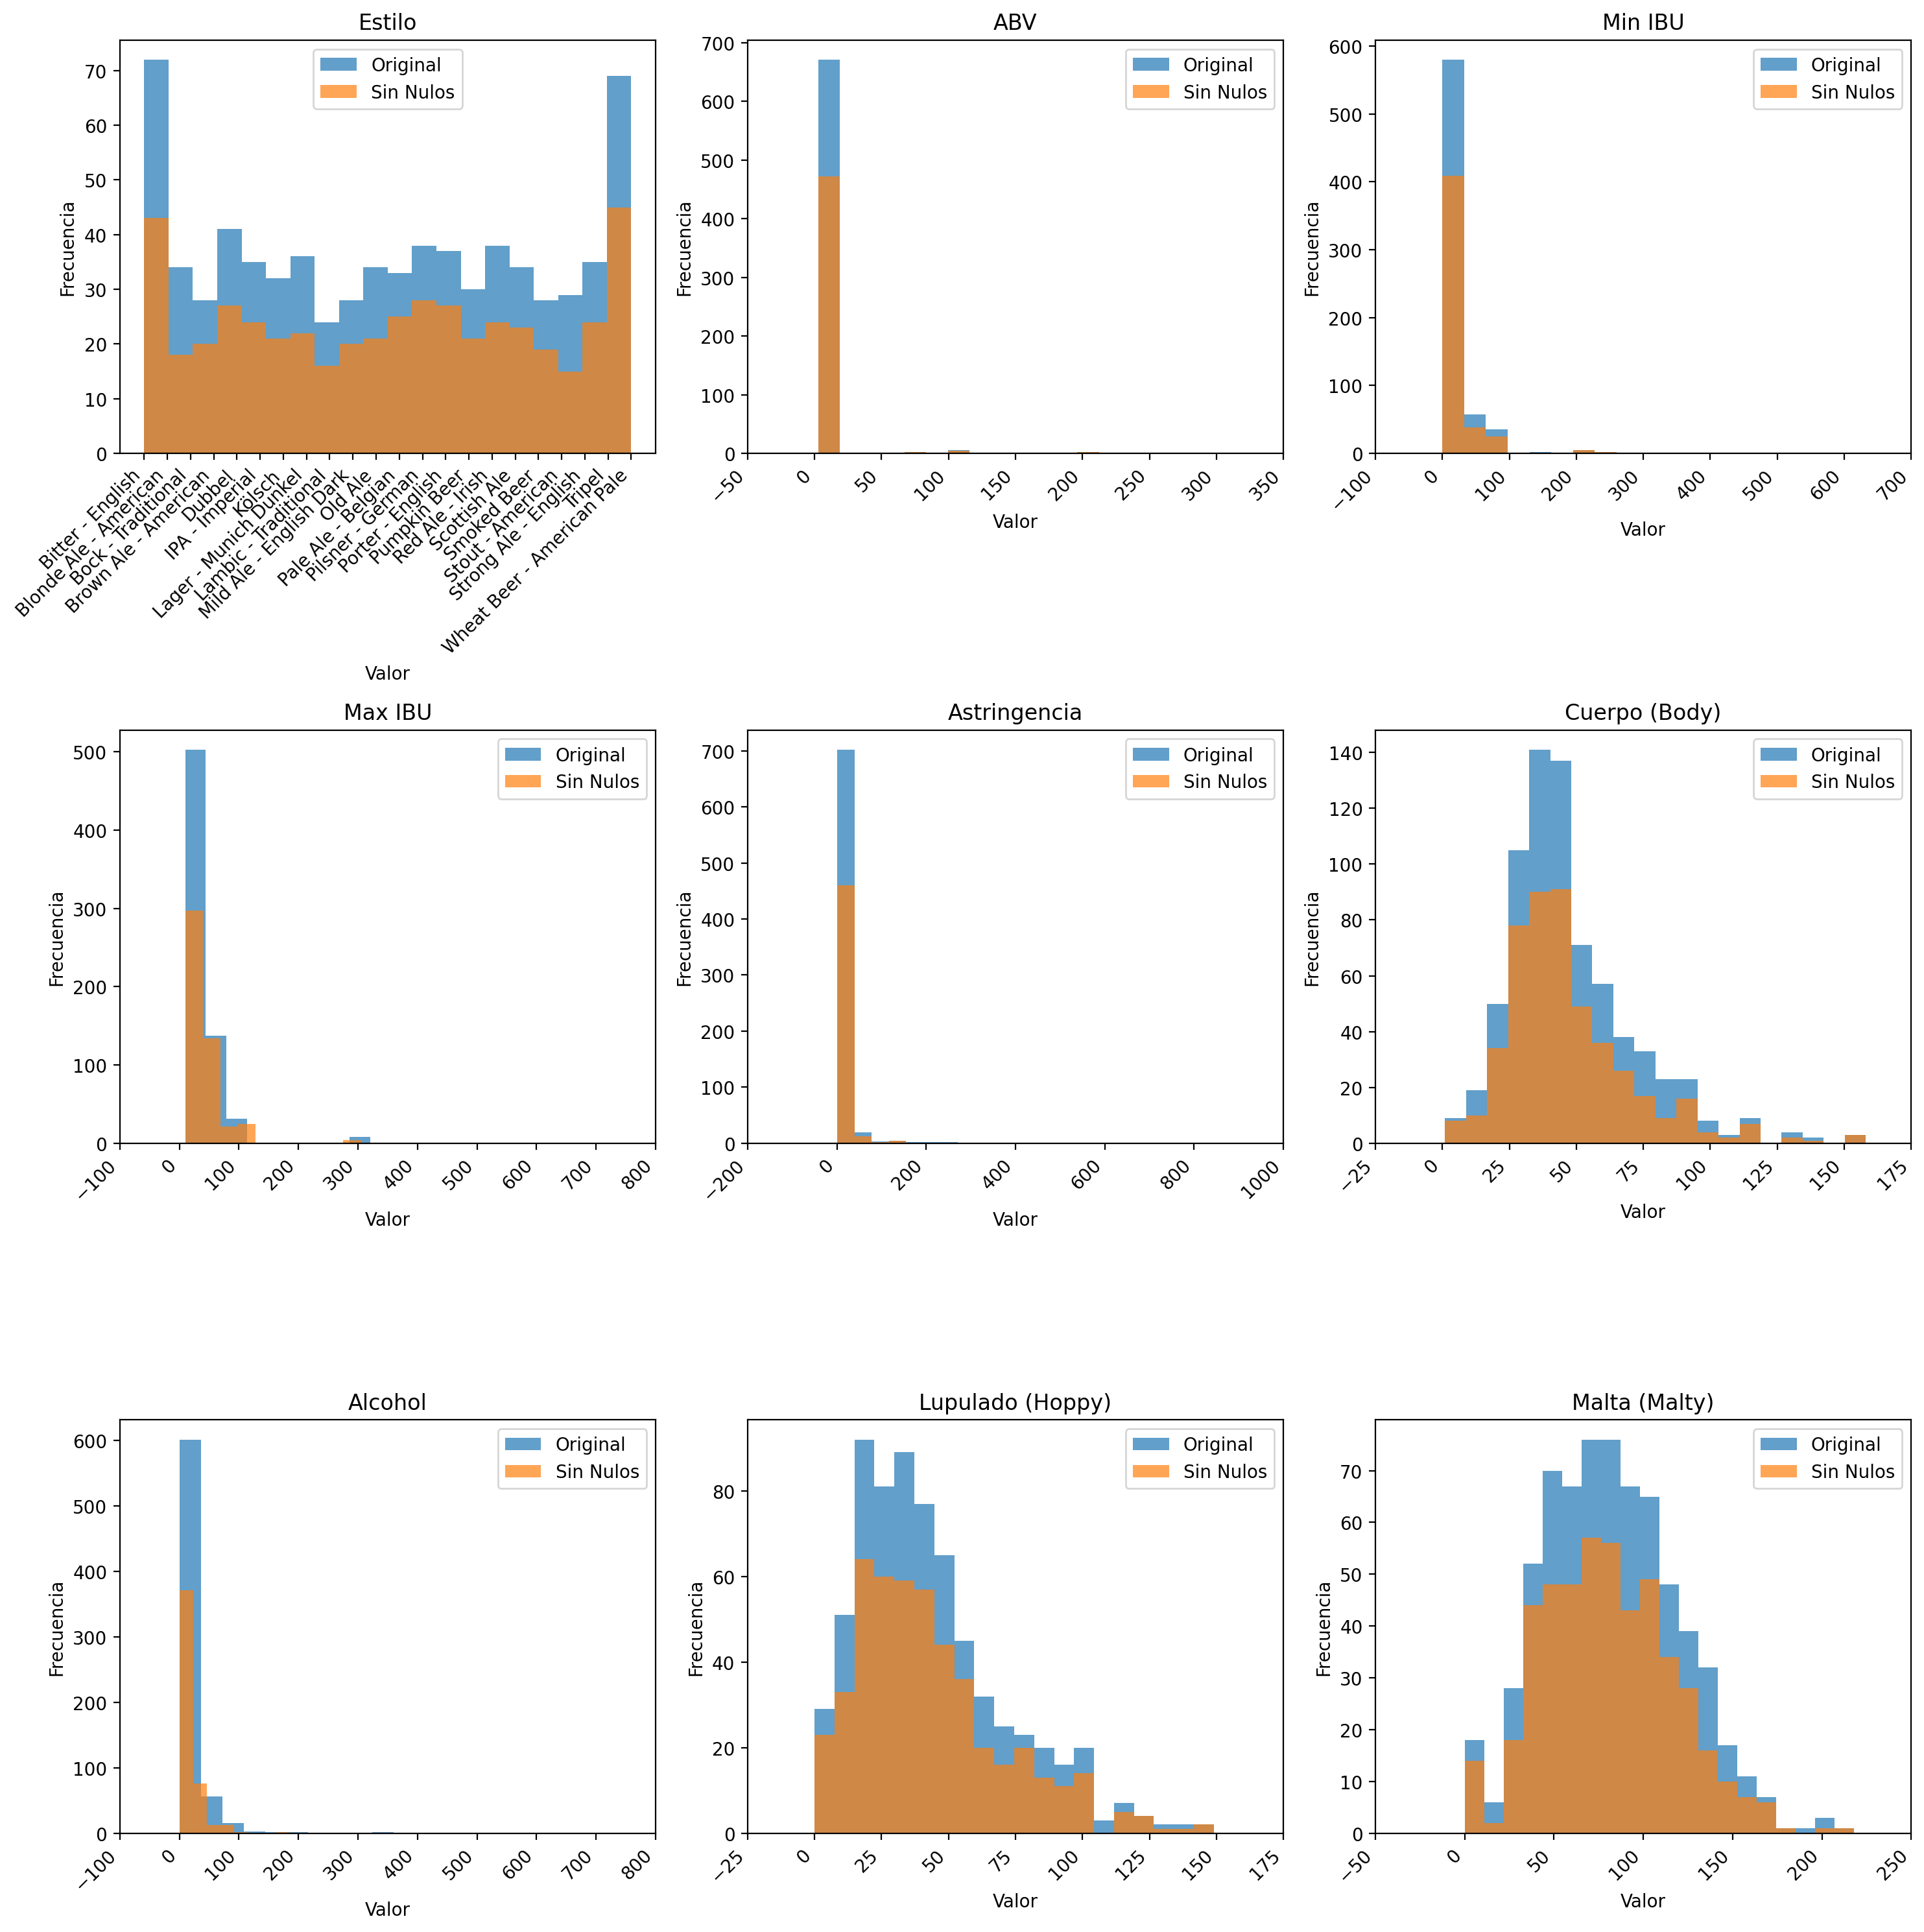

In [ ]:
# Crear una figura con 9 subplots organizados en 3 filas y 3 columnas
num_columns = 3
num_rows = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 15))

# Aplanar la matriz de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Graficar las distribuciones de cada variable en df_beer
for idx, column in enumerate(df_beer.columns):
    ax = axes[idx]  # Obtener el eje actual
    ax.hist(df_beer[column], bins=20, alpha=0.7, label='Original')
    ax.hist(df_beer_sin_nulos[column], bins=20, alpha=0.7, label='Sin Nulos')
    ax.set_title(column)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')
    ax.legend()

    # Configurar las marcas y etiquetas del eje x
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Definir un umbral para detectar outliers basados en z-score
outlier_threshold = 2

# Calcular los z-scores para las columnas numéricas
z_scores = zscore(df_beer_sin_nulos.select_dtypes(include=['float64', 'int64']))

# Crear un DataFrame de booleanos donde True indica la presencia de outliers
outliers_mask = (z_scores > outlier_threshold).any(axis=1)

# Crear un nuevo DataFrame df_beer_sin_outliers eliminando las filas con outliers
df_beer_sin_outliers = df_beer_sin_nulos[~outliers_mask]

# Imprimir DataFrame sin outliers
print(df_beer_sin_outliers)


                         Estilo  ABV  Min IBU  Max IBU  Astringencia  \
5              Bitter - English  5.0     20.0     35.0            11   
6              Bitter - English  4.7     20.0     35.0            15   
7              Bitter - English  5.0     20.0     35.0            20   
10             Bitter - English  4.2     20.0     35.0            17   
12             Bitter - English  4.1     20.0     35.0            14   
..                          ...  ...      ...      ...           ...   
728  Wheat Beer - American Pale  4.7     10.0     35.0            22   
729  Wheat Beer - American Pale  4.4     10.0     35.0            18   
730  Wheat Beer - American Pale  4.7     10.0     35.0            19   
732  Wheat Beer - American Pale  5.0     10.0     35.0            18   
733  Wheat Beer - American Pale  5.5     10.0     35.0            17   

     Cuerpo (Body)  Alcohol  Lupulado (Hoppy)  Malta (Malty)  
5               38     10.0              75.0           89.0  
6        

In [ ]:
df_beer_sin_outliers

Estilo  ABV  Min IBU  Max IBU  Astringencia  \
5              Bitter - English  5.0     20.0     35.0            11   
6              Bitter - English  4.7     20.0     35.0            15   
7              Bitter - English  5.0     20.0     35.0            20   
10             Bitter - English  4.2     20.0     35.0            17   
12             Bitter - English  4.1     20.0     35.0            14   
..                          ...  ...      ...      ...           ...   
728  Wheat Beer - American Pale  4.7     10.0     35.0            22   
729  Wheat Beer - American Pale  4.4     10.0     35.0            18   
730  Wheat Beer - American Pale  4.7     10.0     35.0            19   
732  Wheat Beer - American Pale  5.0     10.0     35.0            18   
733  Wheat Beer - American Pale  5.5     10.0     35.0            17   

     Cuerpo (Body)  Alcohol  Lupulado (Hoppy)  Malta (Malty)  
5               38     10.0              75.0           89.0  
6               60      9.0              93.0           97.0  
7               39      8.0              43.0           56.0  
10              40      6.0              65.0           88.0  
12              41      6.0              85.0           69.0  
..             ...      ...               ...            ...  
728             30      7.0              11.0           85.0  
729             34      8.0              77.0           67.0  
730             31      4.0              49.0           64.0  
732             32     10.0              41.0           77.0  
733             35     11.0              21.0           69.0  

[394 rows x 9 columns]

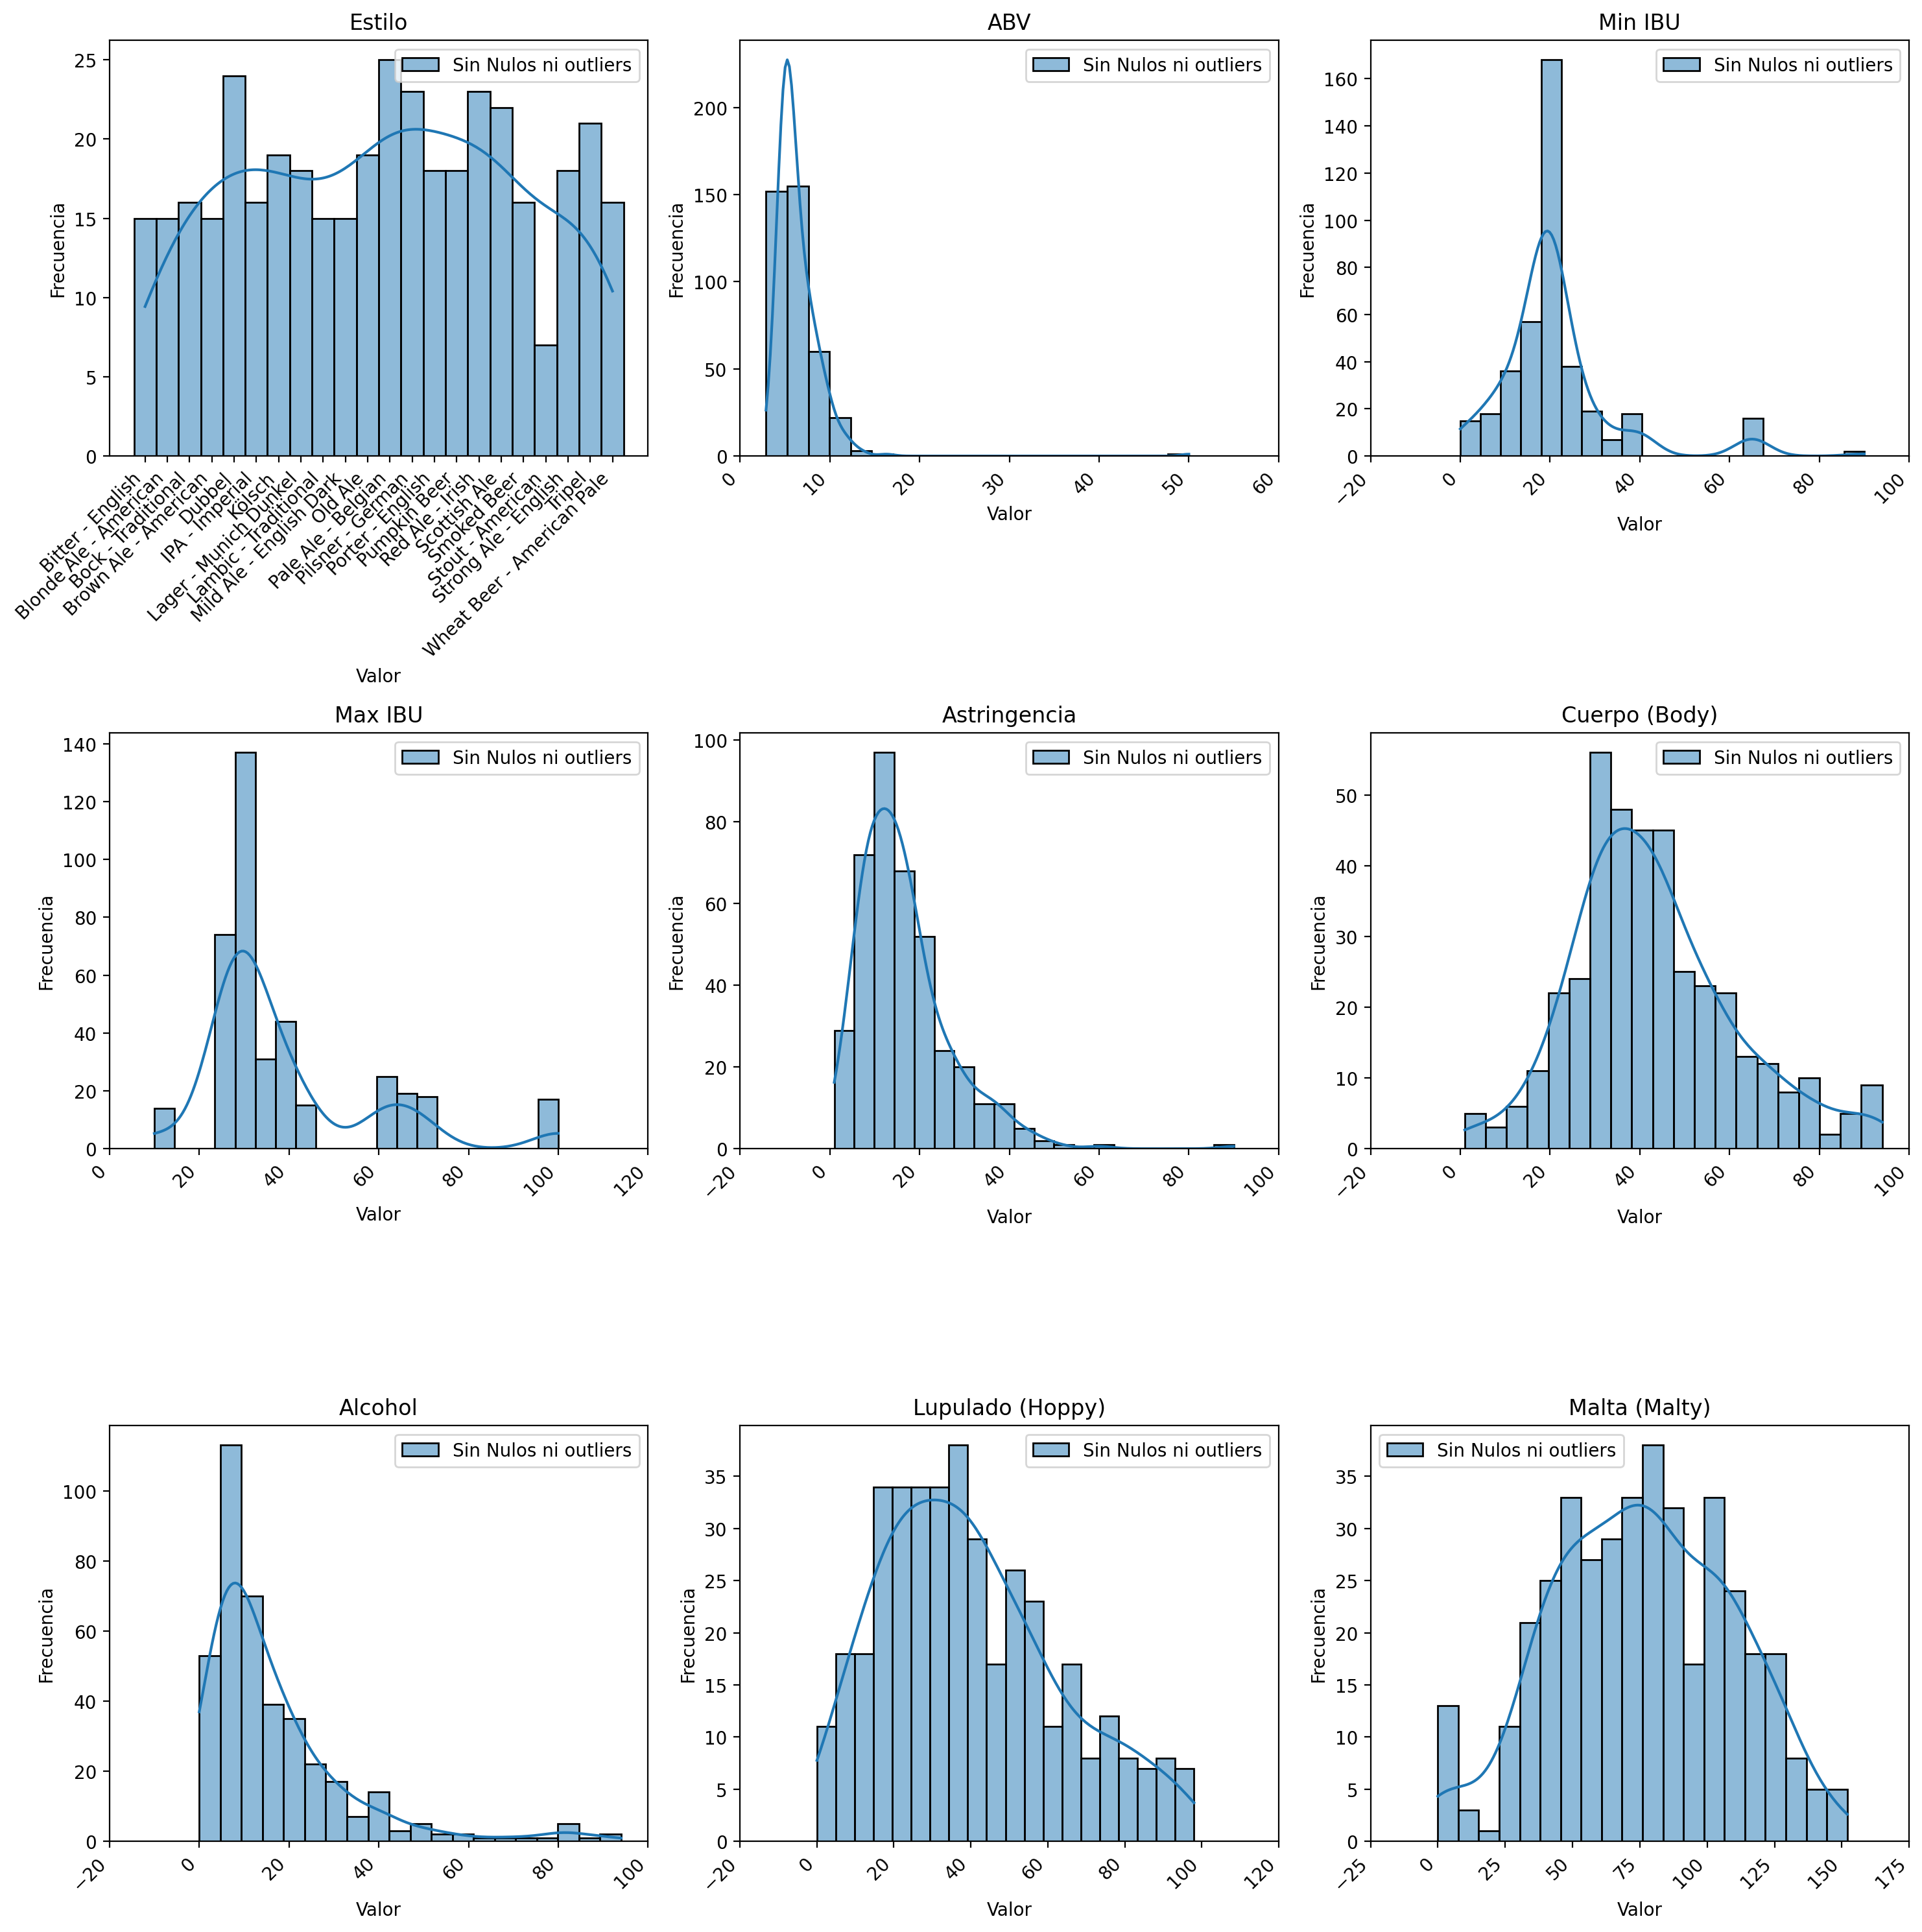

In [ ]:
import seaborn as sns

# Crear una figura con 9 subplots organizados en 3 filas y 3 columnas
num_columns = 3
num_rows = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 15))

# Aplanar la matriz de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Graficar las distribuciones de cada variable en df_beer
for idx, column in enumerate(df_beer.columns):
    ax = axes[idx]  # Obtener el eje actual
    sns.histplot(df_beer_sin_outliers[column], bins=20, ax=ax, label='Sin Nulos ni outliers', kde=True)
    ax.set_title(column)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')
    ax.legend()

    # Configurar las marcas y etiquetas del eje x
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()


#### 2.2.2.1 Curación

##### Encoding de variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Crear una copia del DataFrame para evitar la advertencia
df_beer_sin_outliers_copy = df_beer_sin_outliers.copy()

# Codificar las etiquetas y asignarlas utilizando .loc en la copia
df_beer_sin_outliers_copy.loc[:, 'Estilo_encoded'] = label_encoder.fit_transform(df_beer_sin_outliers_copy['Estilo'])

# Imprimir el DataFrame con la columna 'Estilo_encoded'
df_beer_sin_outliers_copy


Estilo  ABV  Min IBU  Max IBU  Astringencia  \
5              Bitter - English  5.0     20.0     35.0            11   
6              Bitter - English  4.7     20.0     35.0            15   
7              Bitter - English  5.0     20.0     35.0            20   
10             Bitter - English  4.2     20.0     35.0            17   
12             Bitter - English  4.1     20.0     35.0            14   
..                          ...  ...      ...      ...           ...   
728  Wheat Beer - American Pale  4.7     10.0     35.0            22   
729  Wheat Beer - American Pale  4.4     10.0     35.0            18   
730  Wheat Beer - American Pale  4.7     10.0     35.0            19   
732  Wheat Beer - American Pale  5.0     10.0     35.0            18   
733  Wheat Beer - American Pale  5.5     10.0     35.0            17   

     Cuerpo (Body)  Alcohol  Lupulado (Hoppy)  Malta (Malty)  Estilo_encoded  
5               38     10.0              75.0           89.0               0  
6               60      9.0              93.0           97.0               0  
7               39      8.0              43.0           56.0               0  
10              40      6.0              65.0           88.0               0  
12              41      6.0              85.0           69.0               0  
..             ...      ...               ...            ...             ...  
728             30      7.0              11.0           85.0              21  
729             34      8.0              77.0           67.0              21  
730             31      4.0              49.0           64.0              21  
732             32     10.0              41.0           77.0              21  
733             35     11.0              21.0           69.0              21  

[394 rows x 10 columns]

In [ ]:
# Crear un diccionario de mapeo de etiquetas originales a codificaciones
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Obtener la lista de nombres de clases ordenados por posición
class_names_ordered = [class_name for class_name, class_index in sorted(label_mapping.items(), key=lambda item: item[1])]

##### Separar en caracteristicas (x) y etiquetas (y)


In [ ]:
# Separar las características (X) y las etiquetas (Y)
X = df_beer_sin_outliers_copy[['ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Cuerpo (Body)', 'Alcohol', 'Lupulado (Hoppy)', 'Malta (Malty)']]
Y = df_beer_sin_outliers_copy['Estilo_encoded']

#### 2.2.1.3 Creación de modelo 1



In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba
x_train, x_test ,y_train, y_test = train_test_split( X , Y , random_state=10)

In [ ]:
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6).fit(x_train, y_train)

# Hacemos la predicción:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))

accuracy = 0.8686868686868687


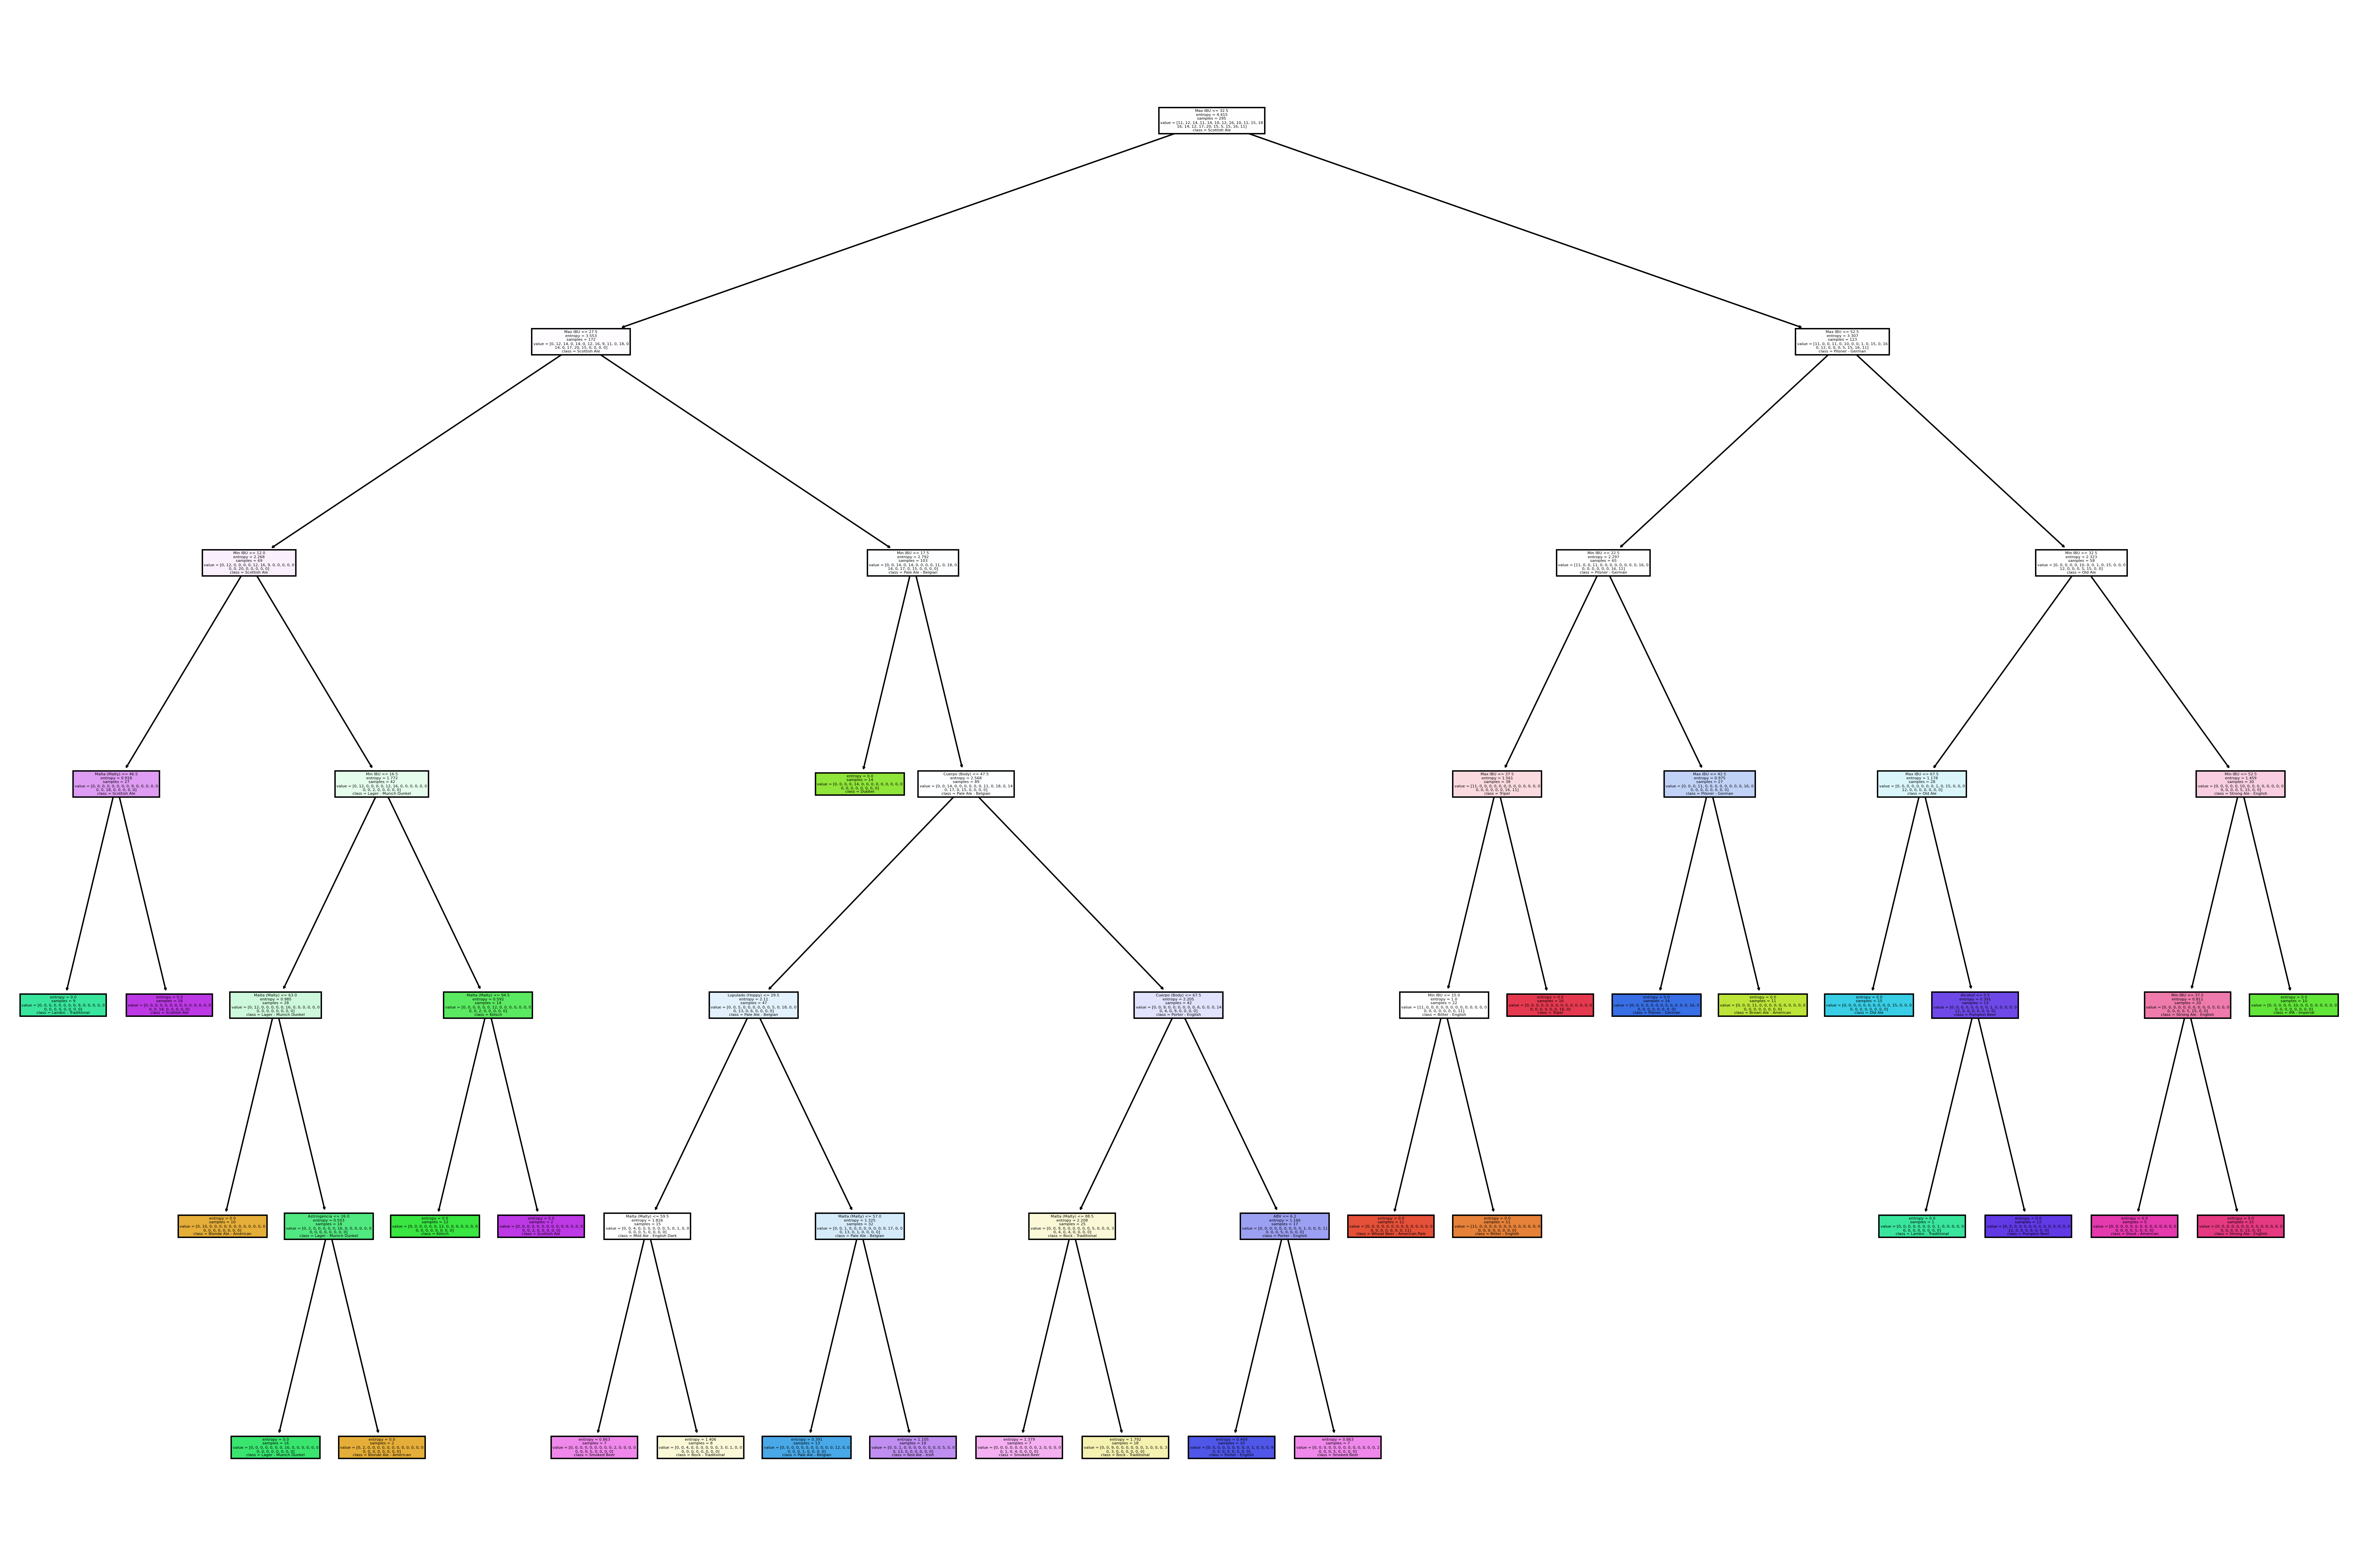

In [ ]:
# Graficamos árbol de decisión.
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names = X.columns, class_names = class_names_ordered)
# plt.savefig('arbol.png')
plt.show()

###🟢2.2.2 Camino "medio"

#### 2.2.2.1 Limpieza

In [ ]:
from scipy.stats import zscore

# Definir un umbral para detectar outliers basados en z-score
outlier_threshold = 2

# Calcular los z-scores para las columnas numéricas
z_scores = zscore(df_beer.select_dtypes(include=['float64', 'int64']),nan_policy= 'omit')

# Crear un DataFrame de booleanos donde True indica la presencia de outliers
outliers_mask = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Calcular las medias de las columnas numéricas
column_means = df_beer.select_dtypes(include=['float64', 'int64']).mean()

# Crear un DataFrame corregido a partir del original
df_beer_sin_outliers_2 = df_beer.copy()

# Iterar sobre las columnas numéricas y reemplazar los valores atípicos con las medias
for column in column_means.index:
    print(column, round(column_means[column],5))
    df_beer_sin_outliers_2.loc[outliers_mask[column], column] = column_means[column]



ABV 8.53692
Min IBU 26.29927
Max IBU 46.40876
Astringencia 20.12925
Cuerpo (Body) 47.84626
Alcohol 21.87299
Lupulado (Hoppy) 43.00292
Malta (Malty) 81.93139


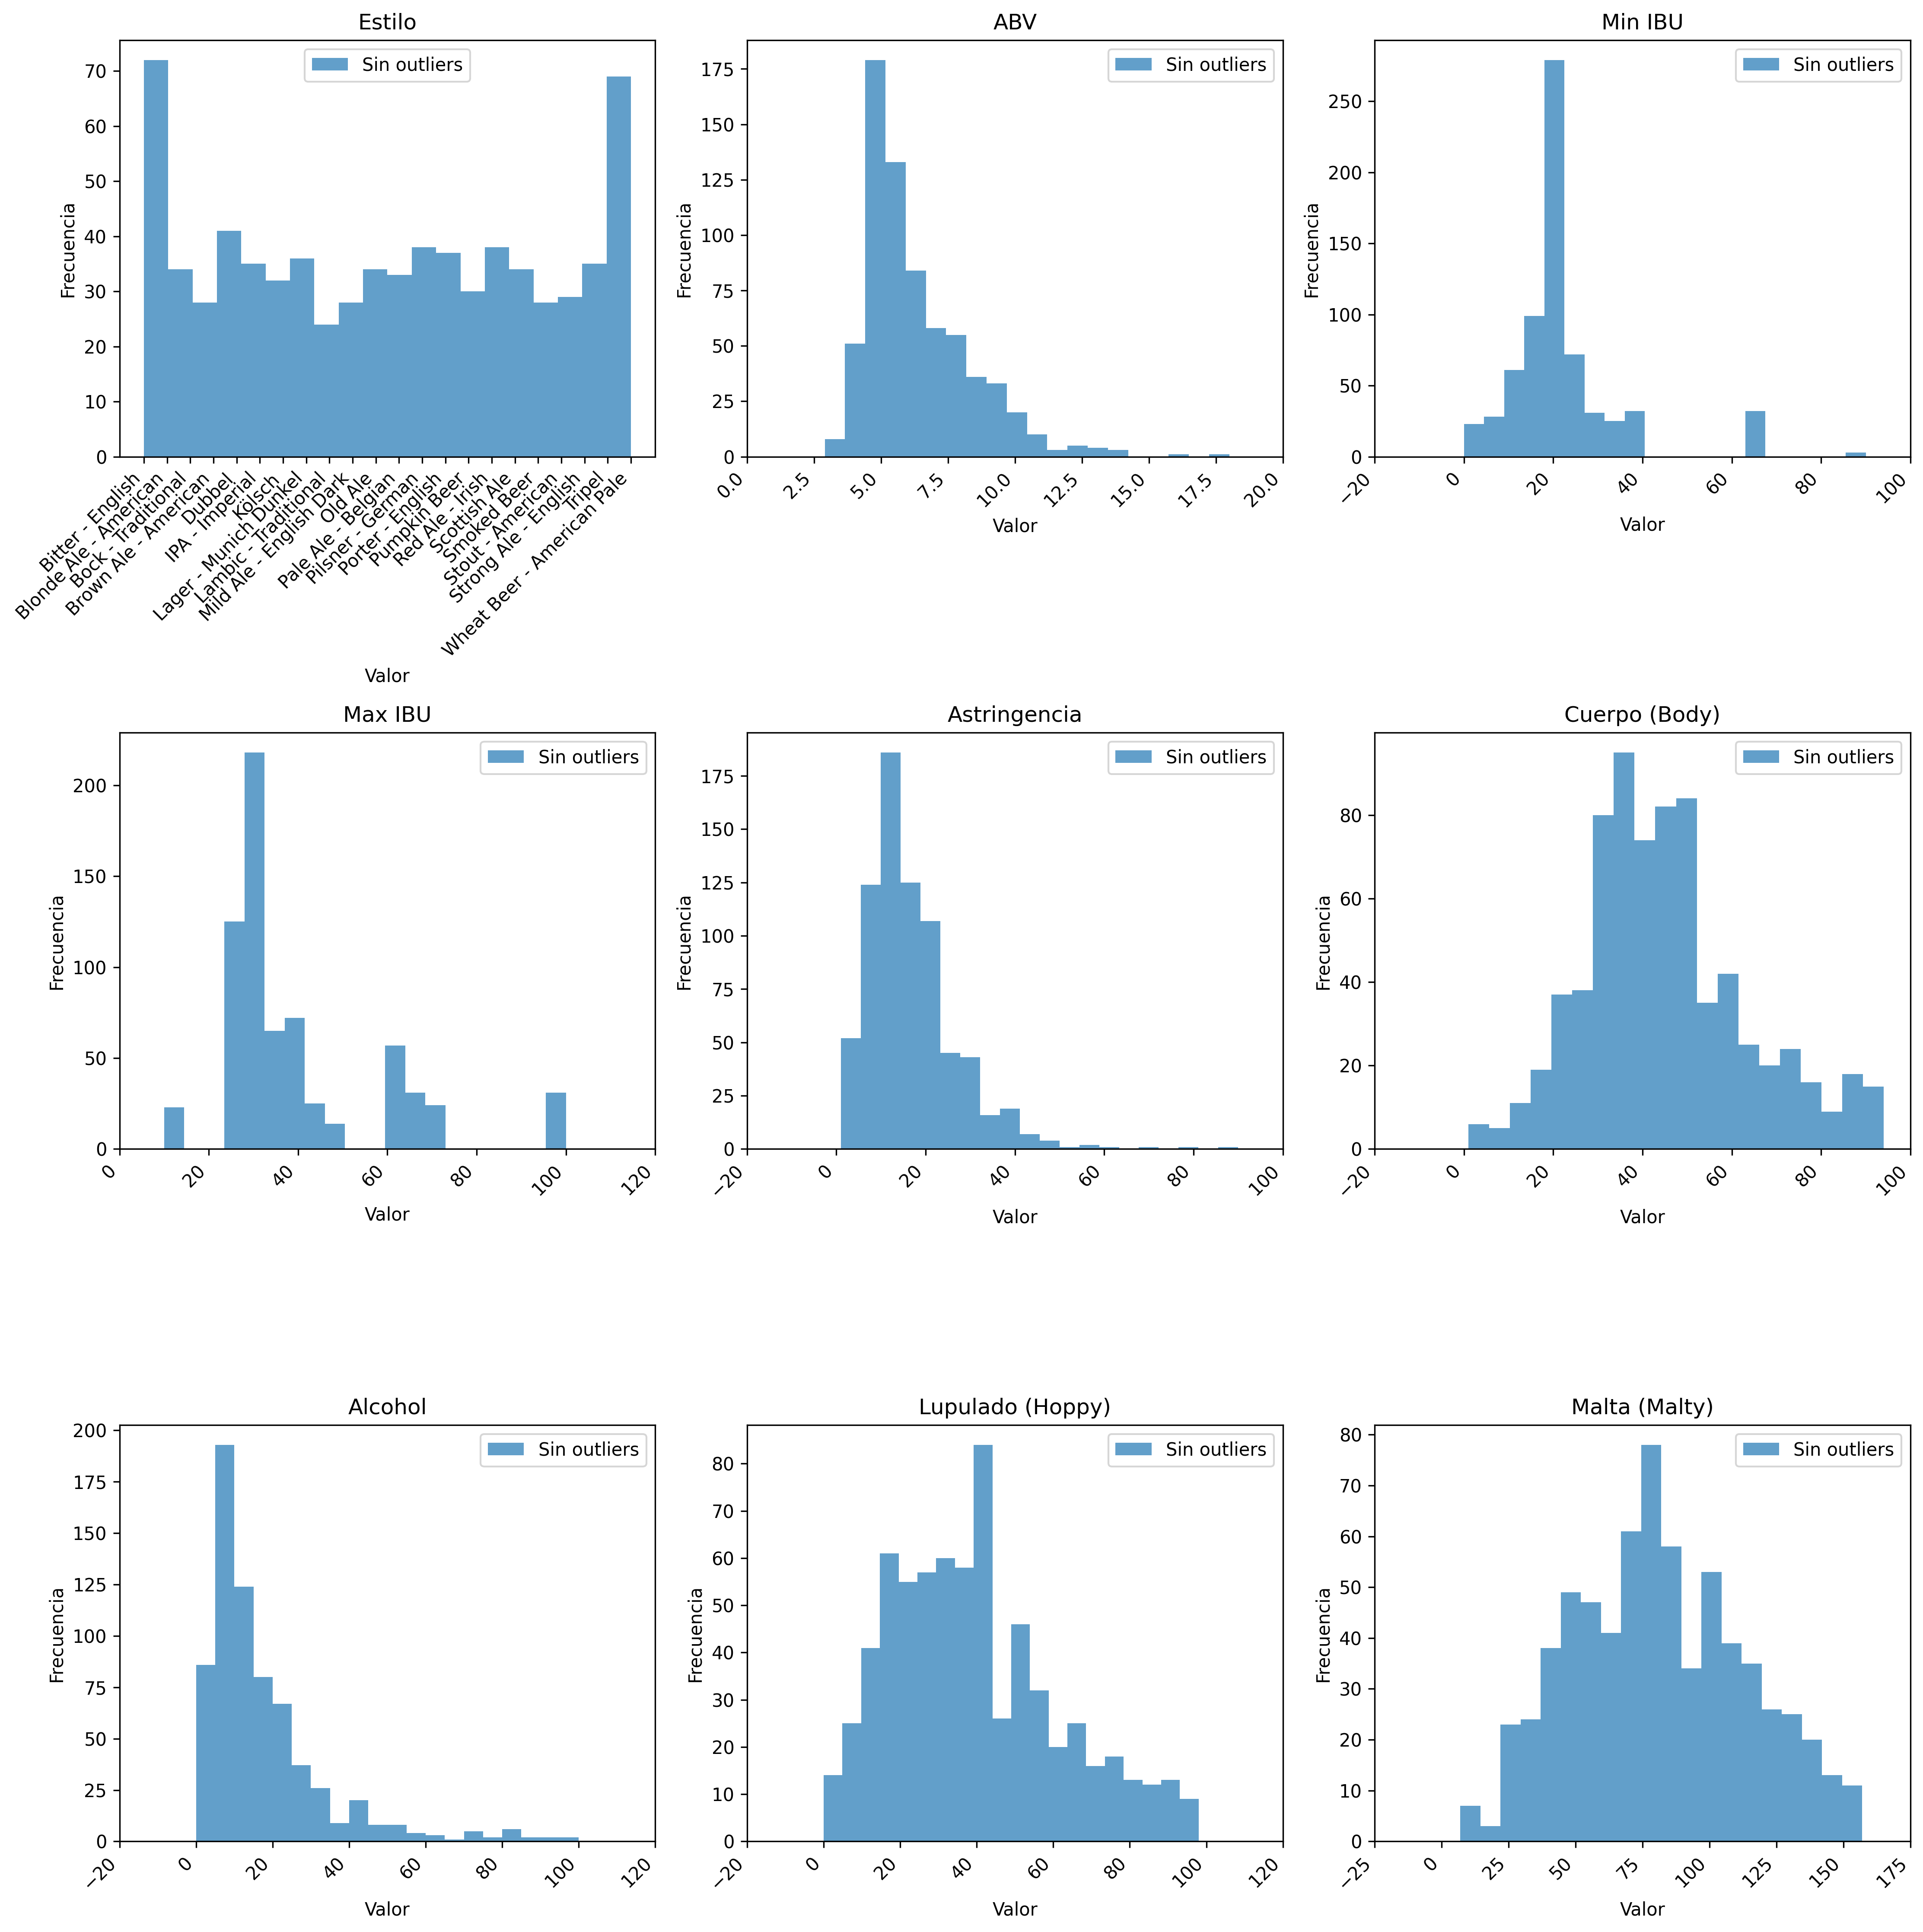

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con 9 subplots organizados en 3 filas y 3 columnas
num_columns = 3
num_rows = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 15))

# Aplanar la matriz de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Graficar las distribuciones de cada variable en df_beer
for idx, column in enumerate(df_beer.columns):
    ax = axes[idx]  # Obtener el eje actual
    ax.hist(df_beer_sin_outliers_2[column], bins=20, alpha=0.7, label='Sin outliers')
    ax.set_title(column)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')
    ax.legend()

    # Configurar las marcas y etiquetas del eje x
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [ ]:
# Reemplazar los valores NaN por las medias de las columnas
df_beer_limpio_2 = df_beer_sin_outliers_2.fillna(column_means)

In [ ]:
print('Limpio y con reemplazo de nan y ouliers:')
print('---------------------------------------------------')
df_beer_limpio_2.info()

print(' ')
print('Dataset crudo: ')
print('---------------------------------------------------')
df_beer.info()

Limpio y con reemplazo de nan y ouliers:
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estilo            735 non-null    object 
 1   ABV               735 non-null    float64
 2   Min IBU           735 non-null    float64
 3   Max IBU           735 non-null    float64
 4   Astringencia      735 non-null    float64
 5   Cuerpo (Body)     735 non-null    float64
 6   Alcohol           735 non-null    float64
 7   Lupulado (Hoppy)  735 non-null    float64
 8   Malta (Malty)     735 non-null    float64
dtypes: float64(8), object(1)
memory usage: 51.8+ KB
 
Dataset crudo: 
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------ 

#### 2.2.2.2 Curación

##### Encoding de variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Crear una copia del DataFrame para evitar la advertencia
df_beer_limpio_2_copy = df_beer_limpio_2.copy()

# Codificar las etiquetas y asignarlas utilizando .loc en la copia
df_beer_limpio_2_copy.loc[:, 'Estilo_encoded'] = label_encoder.fit_transform(df_beer_limpio_2_copy['Estilo'])

# Imprimir el DataFrame con la columna 'Estilo_encoded'
df_beer_limpio_2_copy


Estilo       ABV   Min IBU    Max IBU  Astringencia  \
0              Bitter - English  4.300000  26.29927  35.000000          14.0   
1              Bitter - English  4.700000  20.00000  35.000000          21.0   
2              Bitter - English  8.536915  26.29927  35.000000          29.0   
3              Bitter - English  4.500000  20.00000  35.000000          16.0   
4              Bitter - English  4.800000  20.00000  46.408759          20.0   
..                          ...       ...       ...        ...           ...   
730  Wheat Beer - American Pale  4.700000  10.00000  35.000000          19.0   
731  Wheat Beer - American Pale  4.500000  10.00000  35.000000          28.0   
732  Wheat Beer - American Pale  5.000000  10.00000  35.000000          18.0   
733  Wheat Beer - American Pale  5.500000  10.00000  35.000000          17.0   
734  Wheat Beer - American Pale  5.500000  10.00000  35.000000          21.0   

     Cuerpo (Body)    Alcohol  Lupulado (Hoppy)  Malta (Malty)  Estilo_encoded  
0             35.0   3.000000          58.00000           79.0               0  
1             49.0   9.000000          43.00292          108.0               0  
2             43.0  15.000000          43.00292           81.0               0  
3             22.0  21.872993          76.00000           61.0               0  
4             69.0  14.000000          84.00000           89.0               0  
..             ...        ...               ...            ...             ...  
730           31.0   4.000000          49.00000           64.0              21  
731           52.0  11.000000          43.00292           72.0              21  
732           32.0  10.000000          41.00000           77.0              21  
733           35.0  11.000000          21.00000           69.0              21  
734           29.0  21.872993          25.00000           95.0              21  

[735 rows x 10 columns]

In [ ]:
# Crear un diccionario de mapeo de etiquetas originales a codificaciones
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Obtener la lista de nombres de clases ordenados por posición
class_names_ordered = [class_name for class_name, class_index in sorted(label_mapping.items(), key=lambda item: item[1])]

##### Separar en caracteristicas (x) y etiquetas (y)


In [ ]:
# Separar las características (X) y las etiquetas (Y)
X = df_beer_limpio_2_copy[['ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Cuerpo (Body)', 'Alcohol', 'Lupulado (Hoppy)', 'Malta (Malty)']]
Y = df_beer_limpio_2_copy['Estilo_encoded']

#### 2.2.2.3 Creación de modelo 2



In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba
x_train, x_test ,y_train, y_test = train_test_split( X , Y , random_state= 4 )

In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba
x_train, x_test ,y_train, y_test = train_test_split( X , Y , random_state=4)
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 8).fit(x_train, y_train)

# Hacemos la predicción:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))

accuracy = 0.7880434782608695


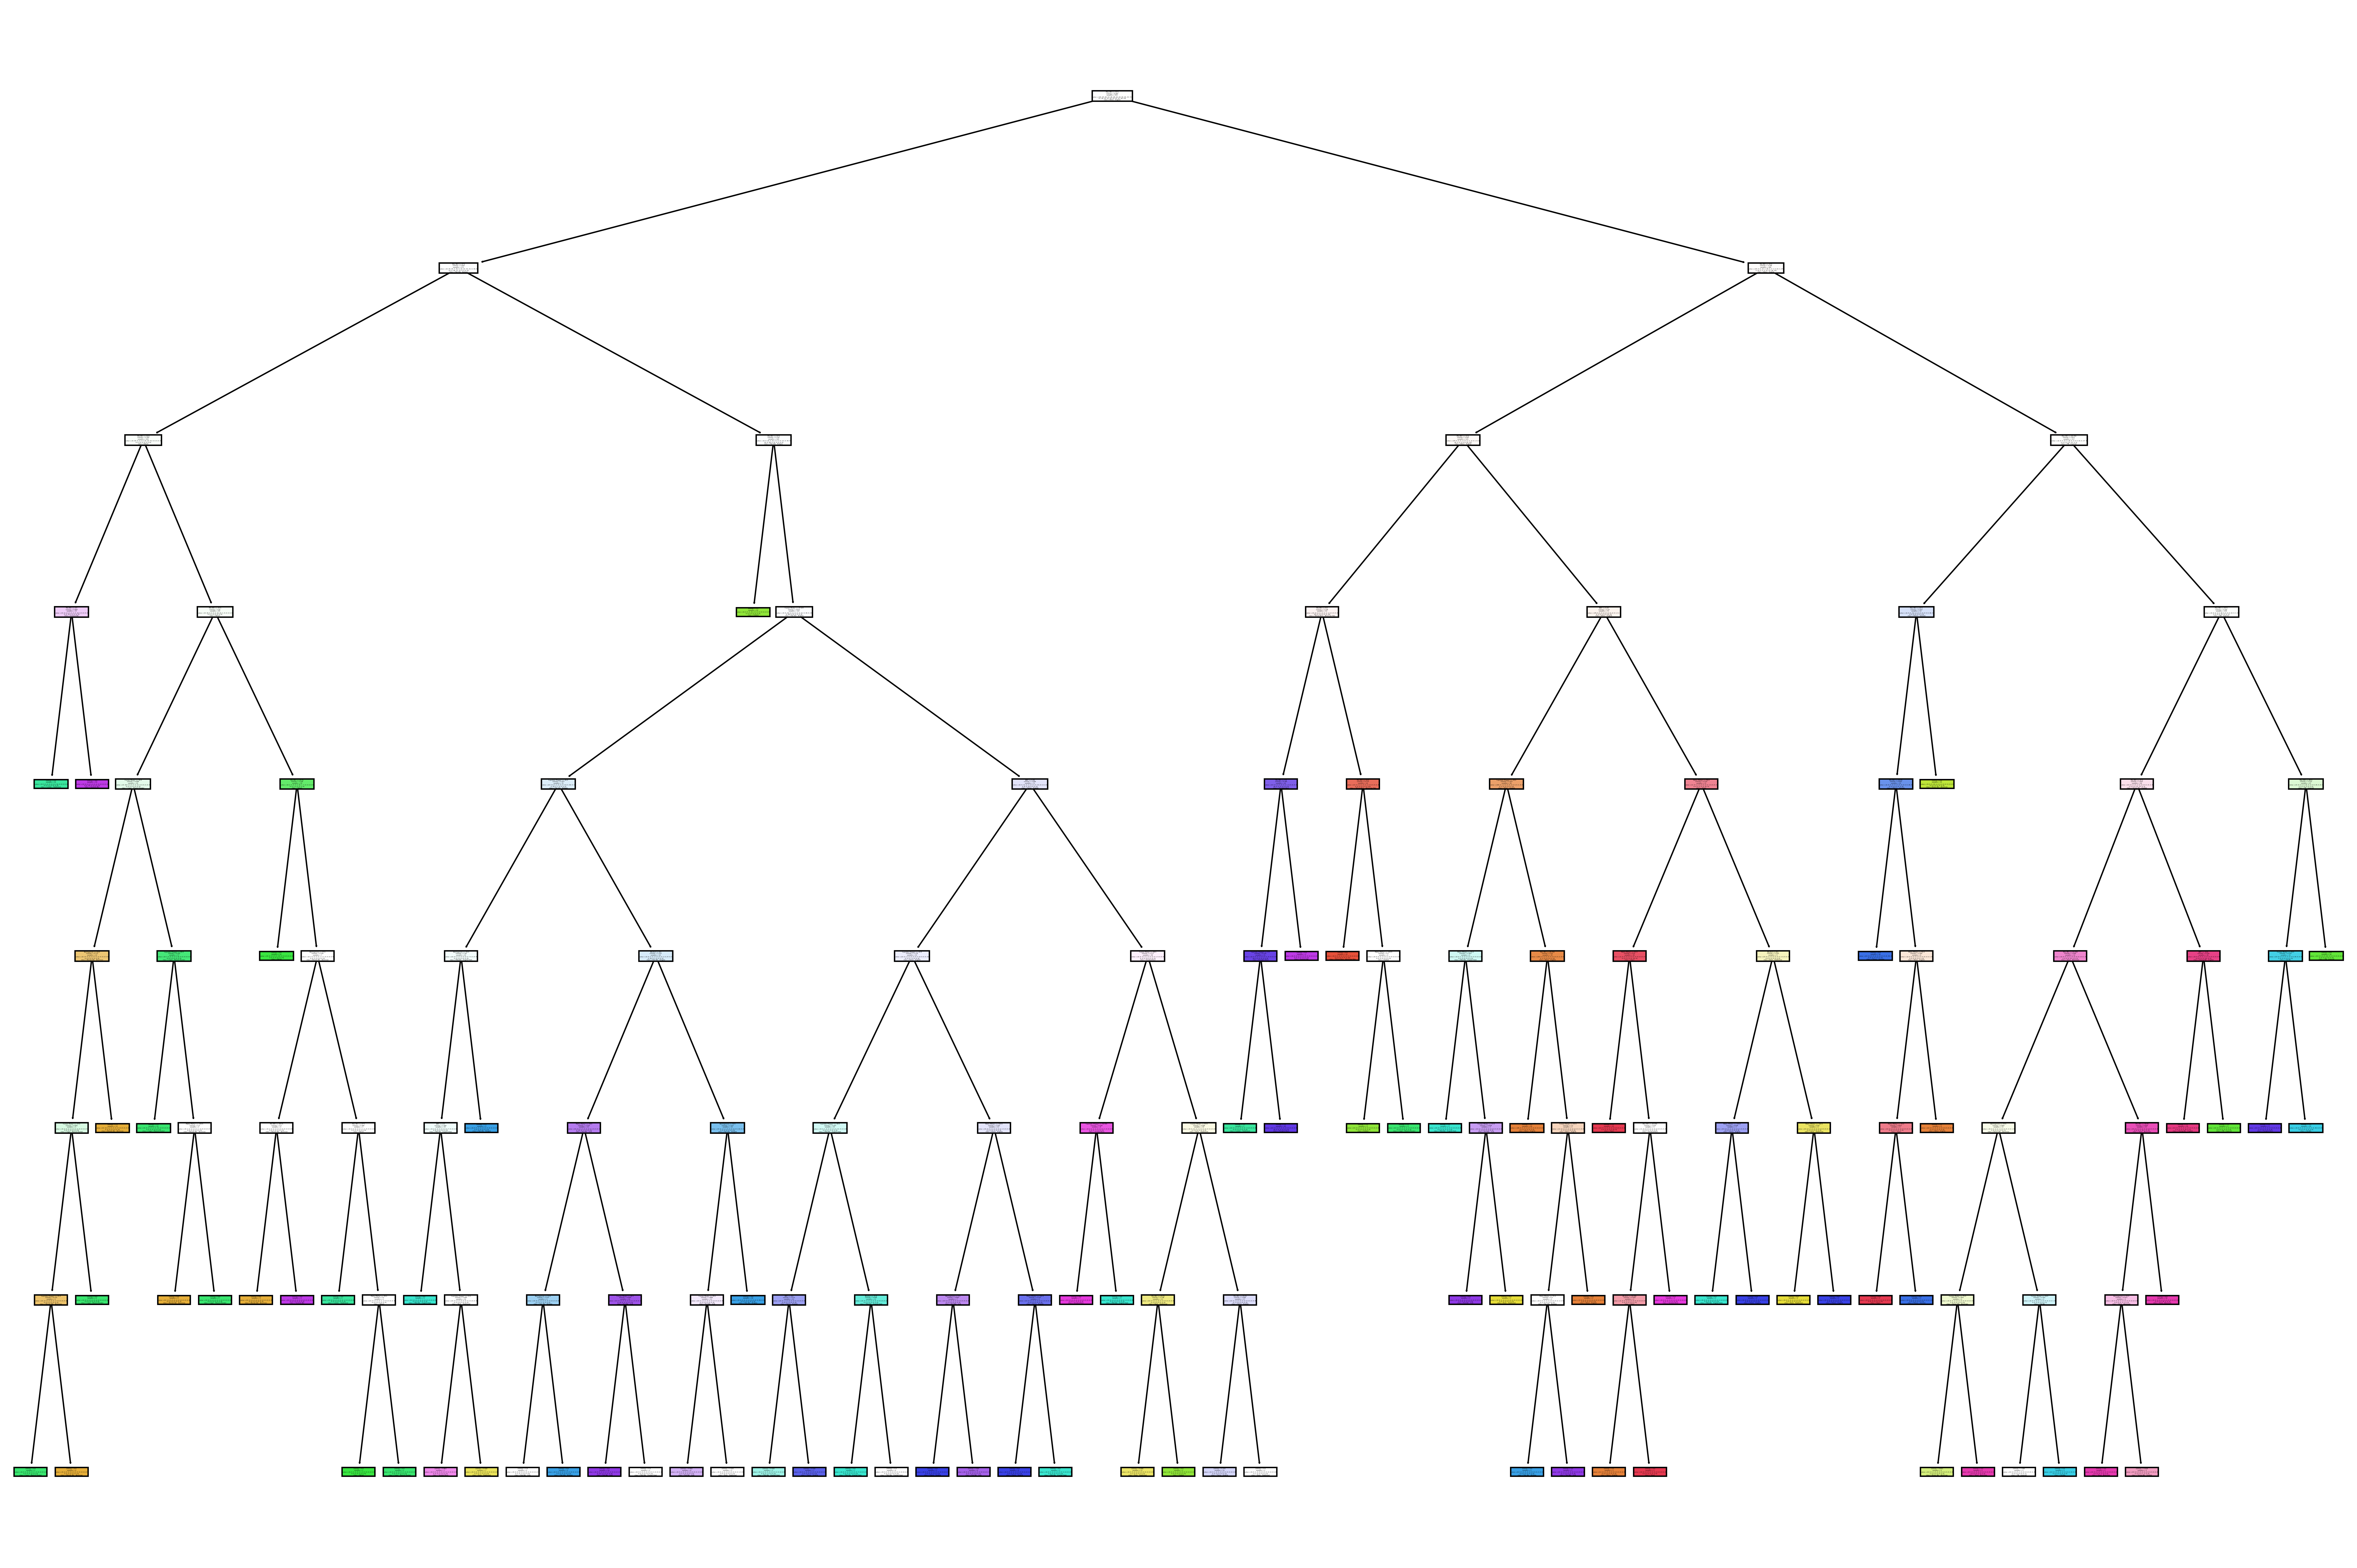

In [ ]:
# Graficamos árbol de decisión.
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names = X.columns, class_names = class_names_ordered)
# plt.savefig('arbol.png')
plt.show()

##🔶2.3 Consideraciones

* El modelo 1 fue realizado utilizando una base de datos procesada con un enfoque simple de eliminación de datos atípicos y nulos llevando la base de datos prácticamente a la mitad de ejemplos.
* Para el modelo 2 se utilizó un enfoque basado en la imputación de la media de todos los datos de la característica correspondiente, manteniendo la cantidad de ejemplos.
* El modelo 1 tiene una ligera mejor performance que el modelo 2

¿Qué pasó? 🤔❓

La imputación por la media, no es necesariamente el mejor enfoque, sobre todo en un dataset con tantas clases!
Generalmente se puede utilizar, sobre todo cuando hay pocos datos y no conocemos bien la naturaleza de la variable.
En este caso estamos obviando las medias de los valores que toma esa característica por clase, simplemente tomamos las medias de todas las clases!

Como todo, se requieren pruebas de performance tanto para los datos de prueba como para el modelo en producción ya que no existe una regla de oro a la hora de tomar el camino del preprocesamiento de los datos. Cada dataset es un mundo…


¿Cómo podría mejorar? 🧐

Inicialmente se podría probar con la imputación de la media por característica y por clase, esto generalmente es más preciso y mejora la performance. Esta estrategia podría proporcionar imputaciones más precisas y realistas, ya que tomaría en cuenta las características únicas de cada clase en lugar de tratar todas las clases por igual.

También existen otros caminos, como por ejemplo el de la imputación por regresión. En este caso se debe entrenar un modelo regresor que nos ayude a reemplazar los valores atípicos y nulos basados en el conjunto de características del dataset, una vez reemplazados los valores se puede entrenar el modelo que utilizaremos. Esto es especialmente útil si ,al realizar la inferencia también se obtienen datos anómalos.




##🔶2.4 Predecir resultado

In [ ]:
#@markdown #Predictor de resultados
#@markdown Para predecir el tipo de cerveza ingrese los siguientes datos:

#@markdown Contenido de Alcohol por Volumen:
ABV = 8.3 # @param {type:"number"}

#@markdown Unidades Internacionales de Amargura (Min)
Min_IBU = 30 # @param {type:"number"}

#@markdown Unidades Internacionales de Amargura (Max)
Max_IBU = 65 # @param {type:"number"}

#@markdown Nivel de astringencia
Astringencia = 3 # @param {type:"number"}

#@markdown Cuerpo
Cuerpo = 37 # @param {type:"number"}


#@markdown Nivel de alcohol
Alcohol = 27 # @param {type:"number"}


#@markdown Lupulado
Lupulado = 22 # @param {type:"number"}

#@markdown Malta
Malta = 72 # @param {type:"number"}

entrada = [ABV, Min_IBU, Max_IBU, Astringencia, Cuerpo, Alcohol, Lupulado, Malta]

entrada = pd.DataFrame(np.array(entrada).reshape(1, 8))
entrada.columns = ['ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Cuerpo (Body)', 'Alcohol', 'Lupulado (Hoppy)', 'Malta (Malty)']
y_pred = clf.predict(entrada)

print(class_names_ordered[y_pred[0]])

Old Ale


# Links 🎓💻

https://scikit-learn.org/stable/datasets/toy_dataset.html

https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set


Tener en cuenta:

- Los datos de Iris fueron tomados el mismo día, con lo que eso implica (poca generalización).

- El dataset beer fué modificado y reducido a los fines de simplificar el análisis.

- No hablamos de métricas

Formulario 😎👍🏻

https://forms.gle/f94yMnm4gYsxGJMm7

Sobre el dataset:

Fuente: BeerAdvocate

Creditos:
* Beer Tasting Profiles Dataset by sp1222.
* 1.5 Million Beer Reviews by Tanya Cashorali (uploaded by Datadoume).